# <center>WIFI 신호로 현재위치 및 빌딩 추측</center>

### 분석자: 박지훈
### 분석일시: 2017.08.10
### 사용자료: UJIIndoorLoc Data Set
### 자료출처: UCL Machine Learning Repository(https://archive.ics.uci.edu/ml/datasets/ujiindoorloc)
### 분석방법: OLS(Ordinary Least Square), QDA(Quadratic Discriminant Analysis)
---

### 패키지 불러오기

In [3]:
# import packages
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import *

### 데이터 불러오기

In [4]:
# data read
raw_train = pd.read_csv("trainingData.csv")
raw_validation = pd.read_csv("validationData.csv")

In [ ]:
raw_train.head()

In [ ]:
raw_validation.head()

---

### EDA(탐색적 시각화)
정규화된 값을 바탕으로 데이터의 분포양상 관찰

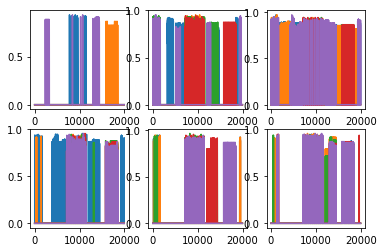

In [7]:
plt.subplot(2, 3, 1)
plt.plot(nor_train.iloc[:, :5])
plt.subplot(2, 3, 2)
plt.plot(nor_train.iloc[:, 5:10])
plt.subplot(2, 3, 3)
plt.plot(nor_train.iloc[:, 10:15])
plt.subplot(2, 3, 4)
plt.plot(nor_train.iloc[:, 15:20])
plt.subplot(2, 3, 5)
plt.plot(nor_train.iloc[:, 20:25])
plt.subplot(2, 3, 6)
plt.plot(nor_train.iloc[:, 25:30])
plt.show()

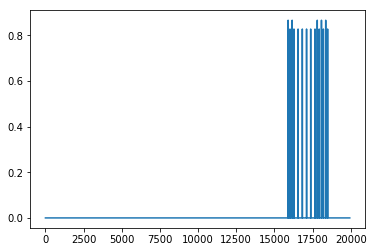

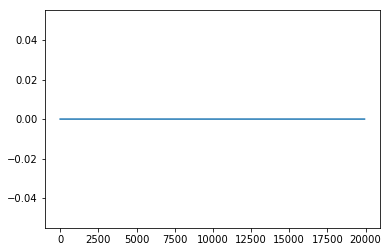

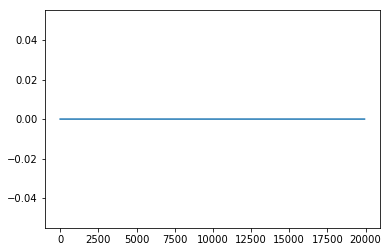

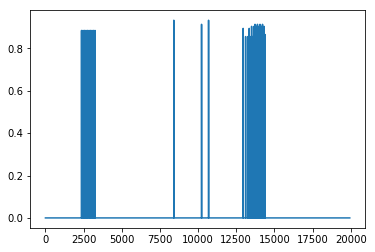

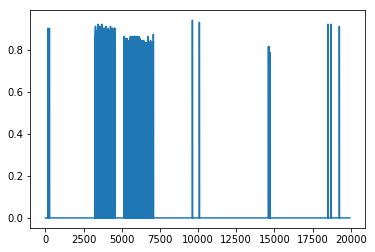

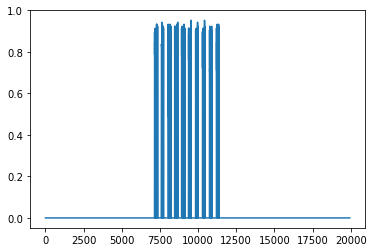

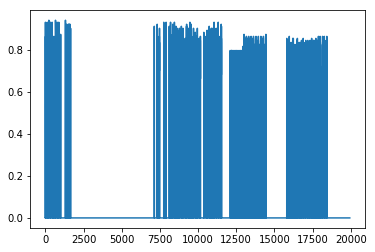

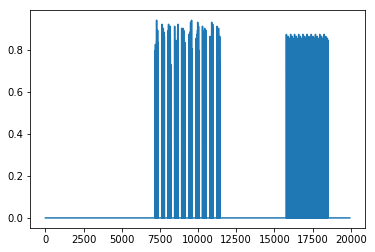

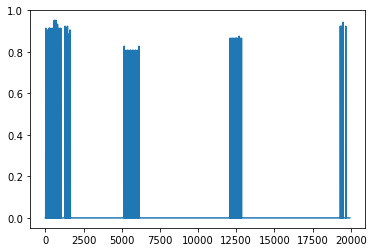

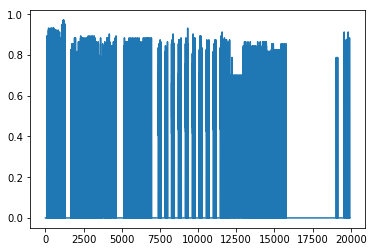

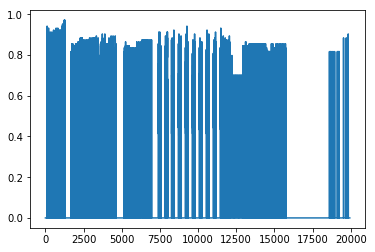

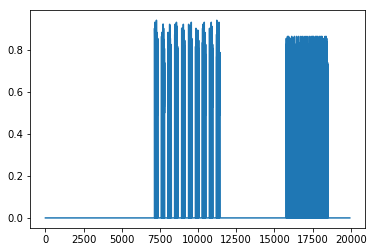

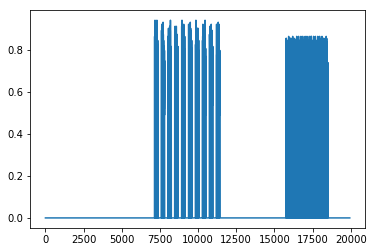

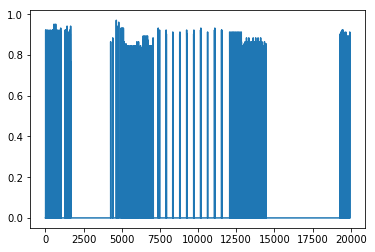

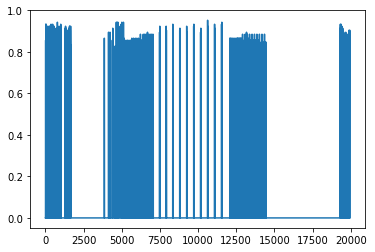

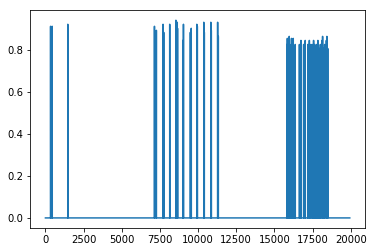

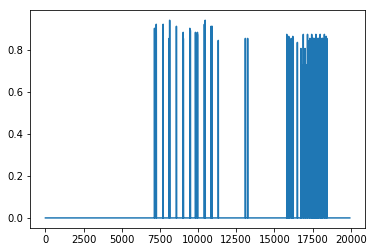

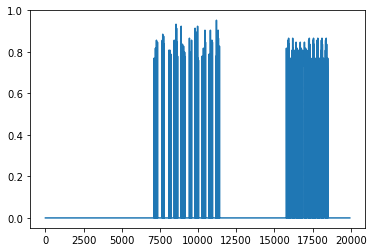

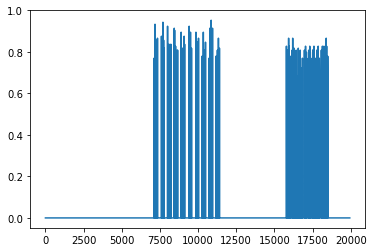

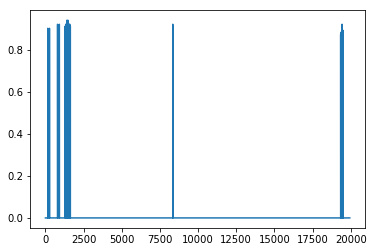

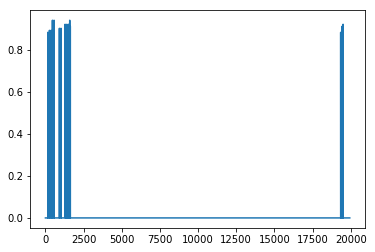

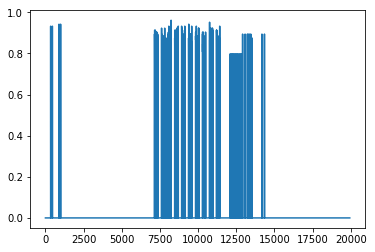

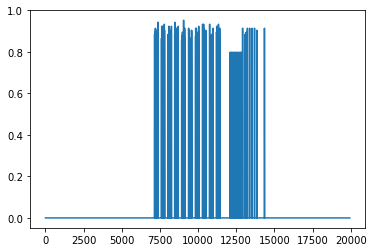

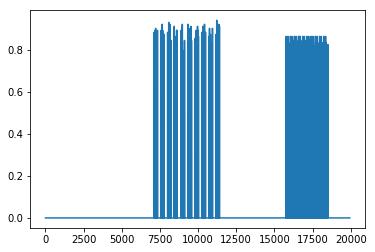

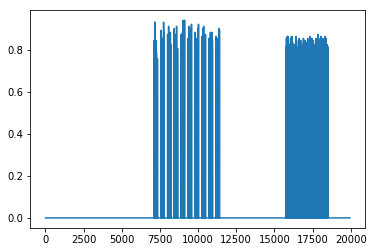

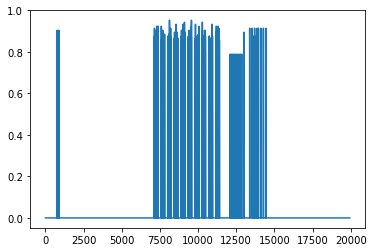

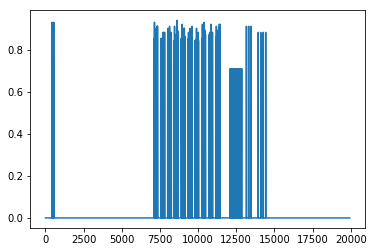

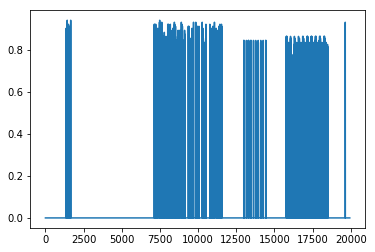

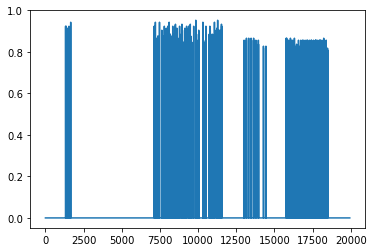

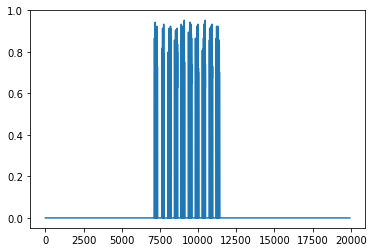

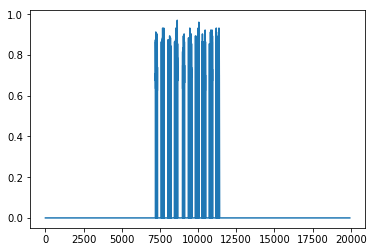

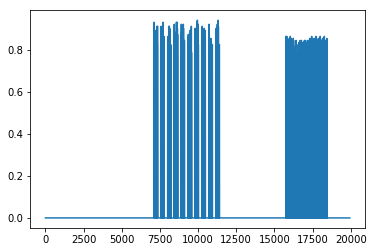

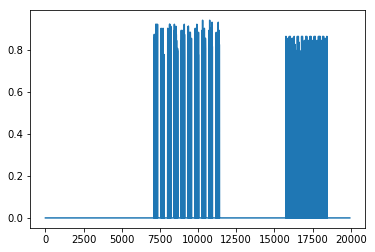

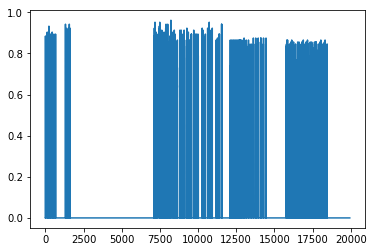

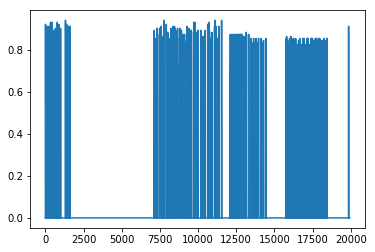

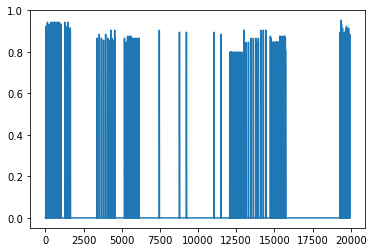

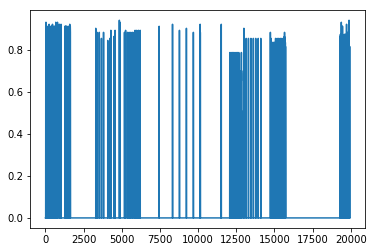

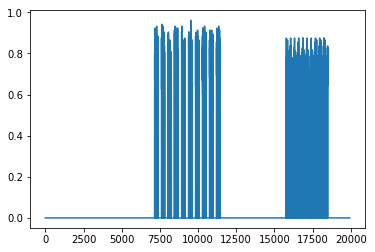

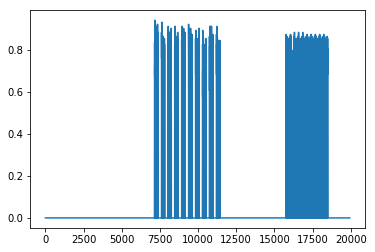

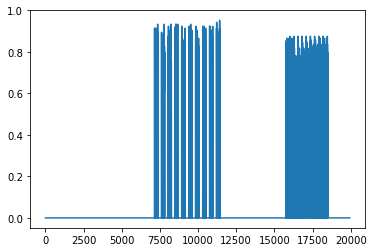

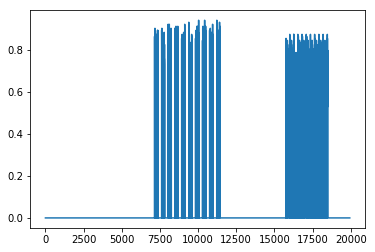

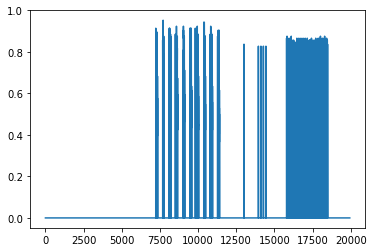

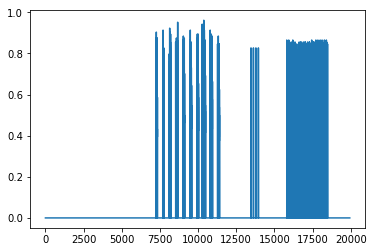

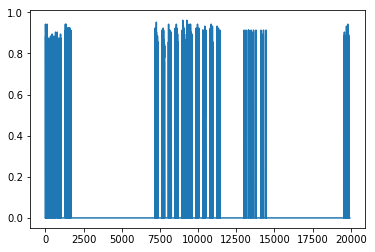

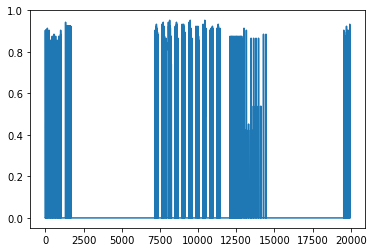

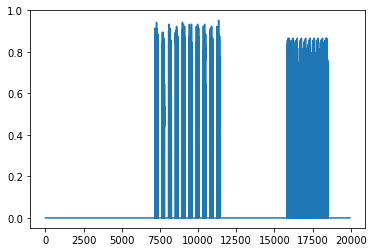

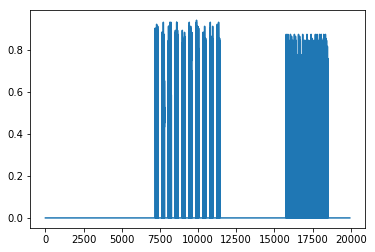

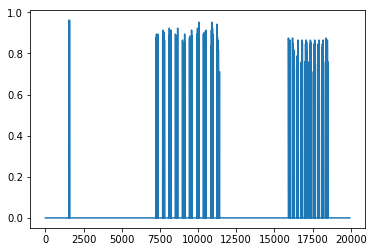

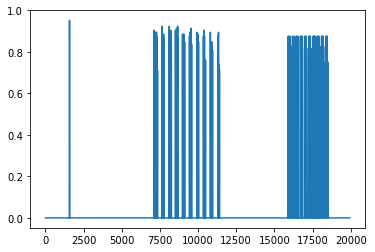

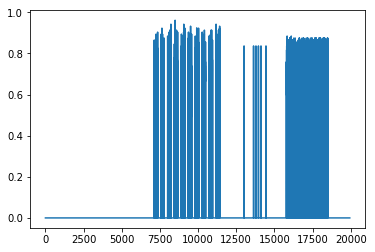

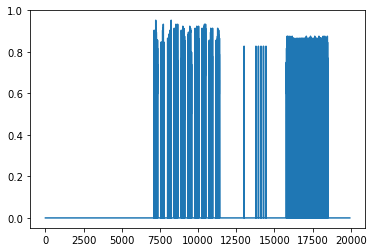

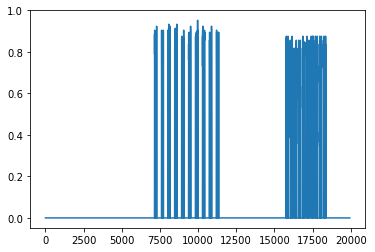

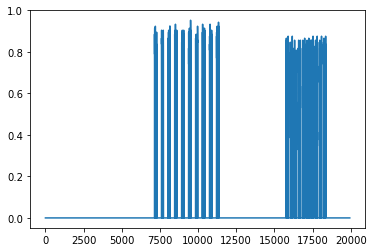

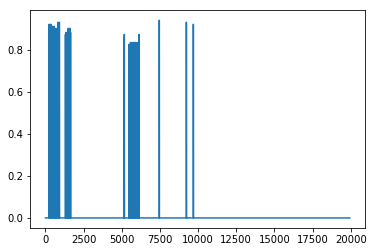

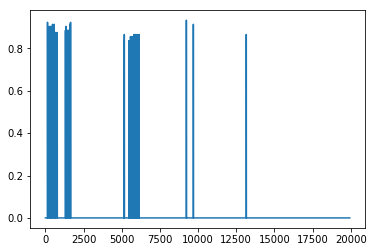

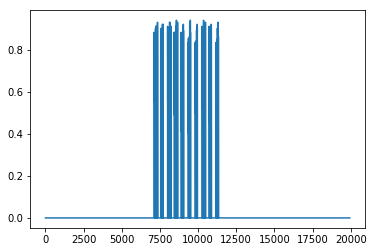

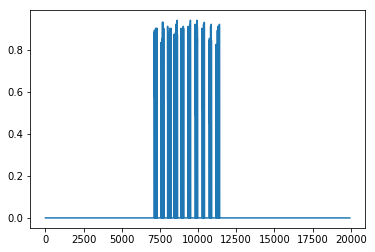

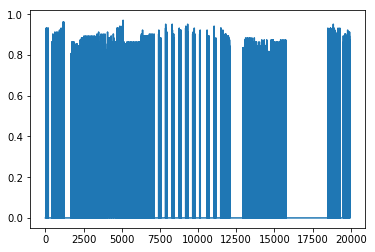

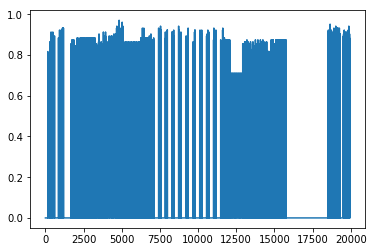

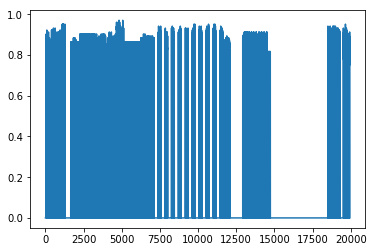

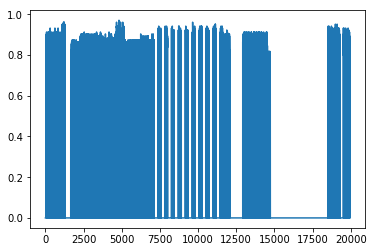

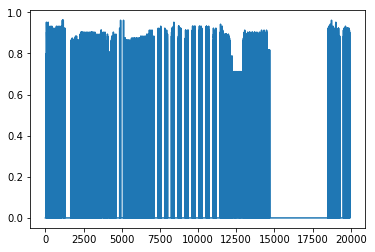

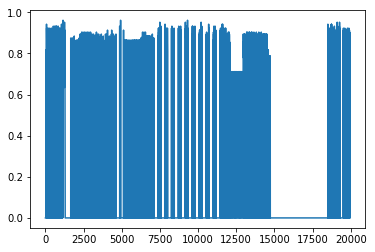

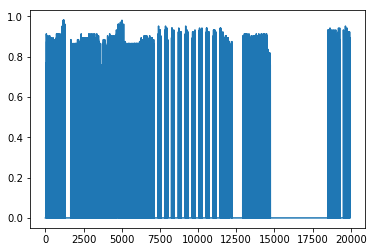

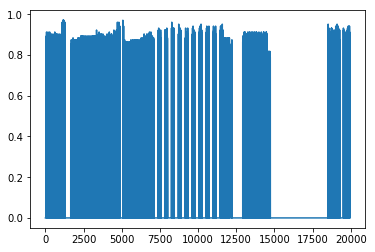

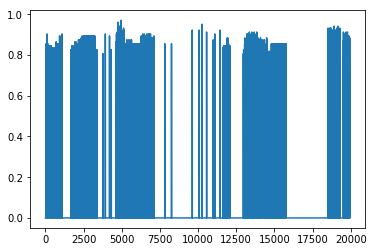

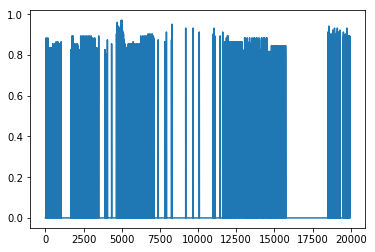

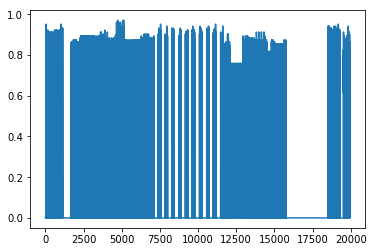

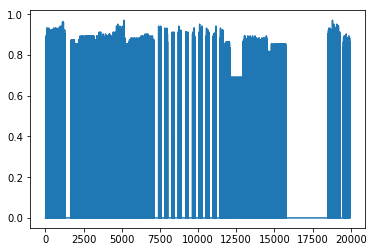

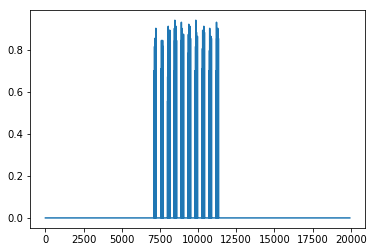

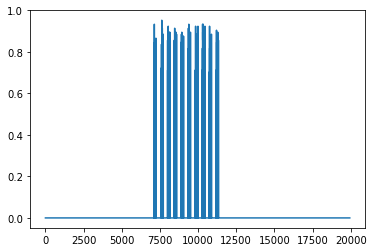

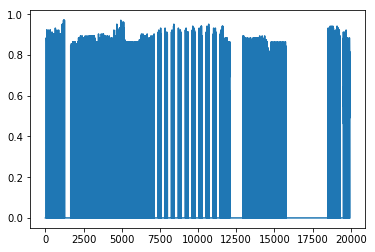

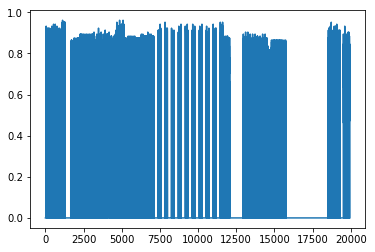

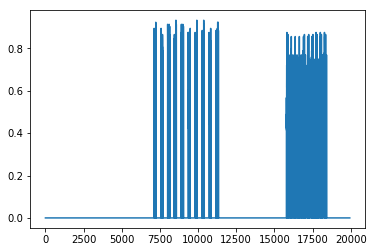

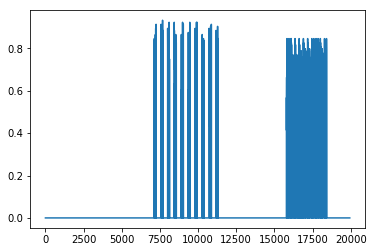

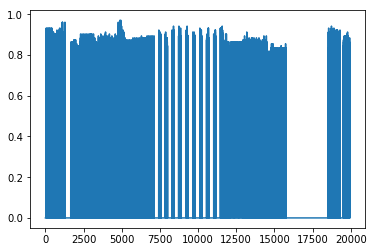

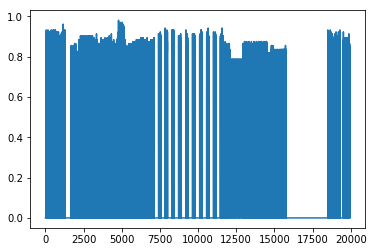

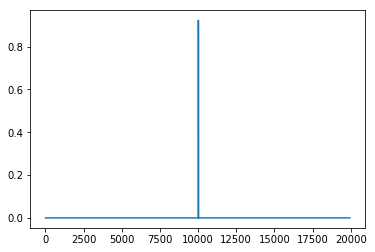

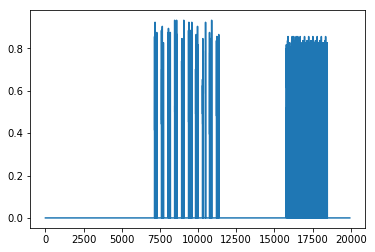

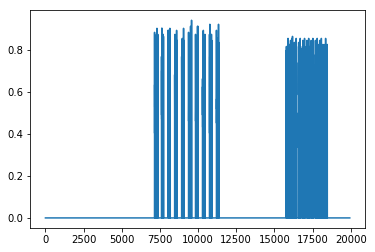

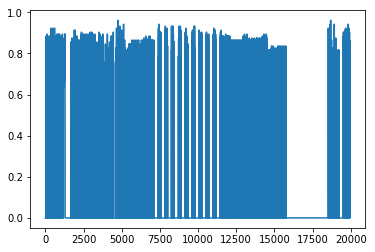

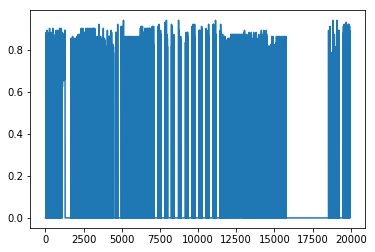

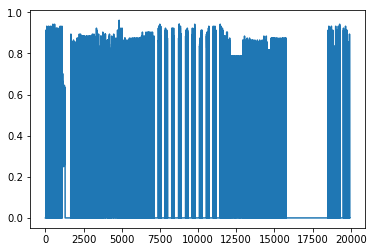

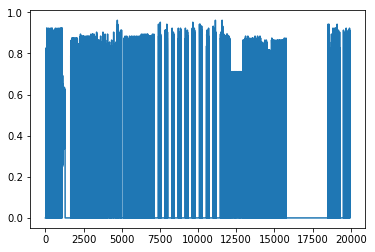

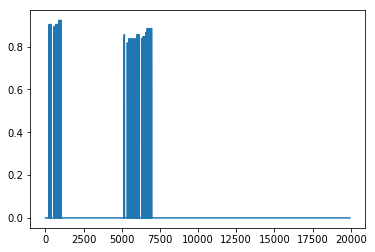

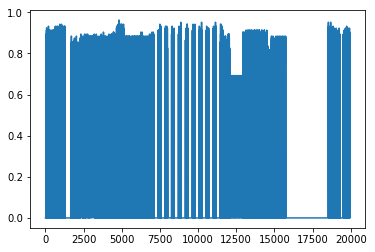

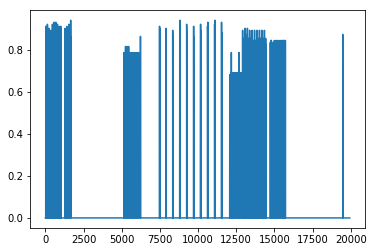

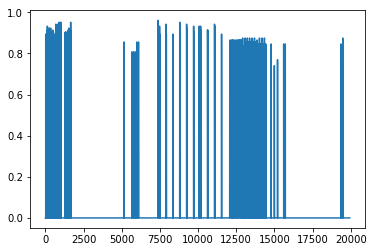

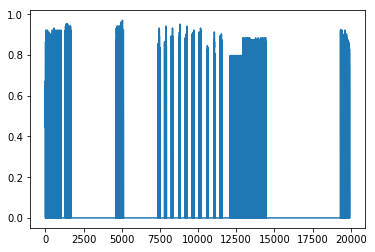

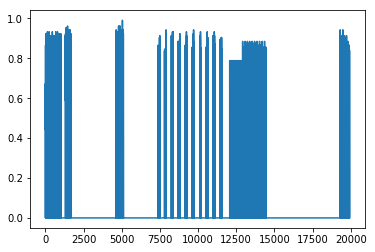

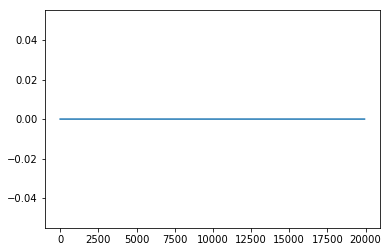

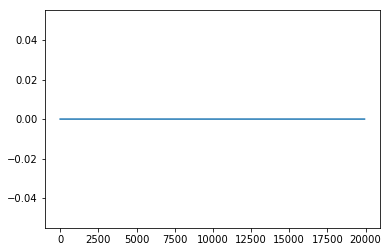

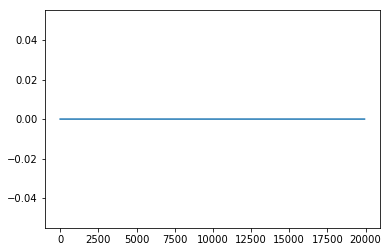

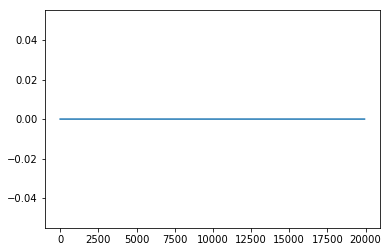

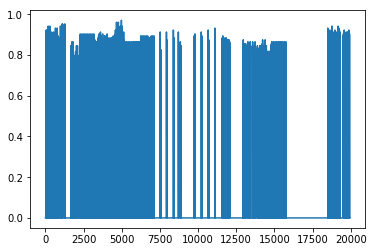

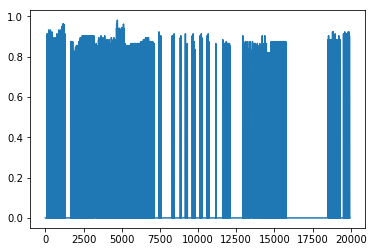

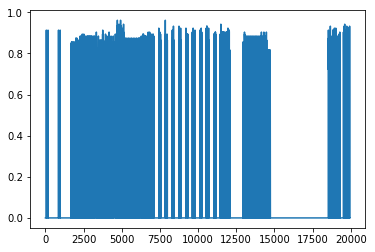

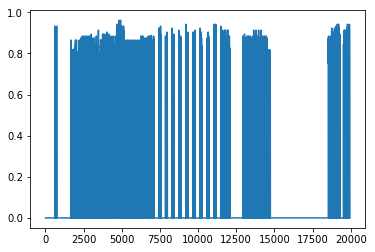

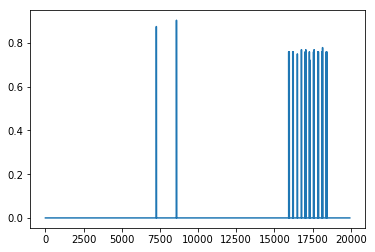

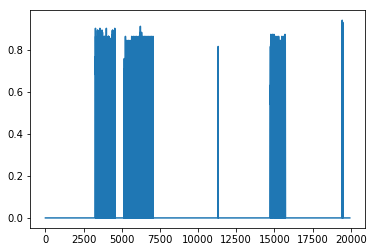

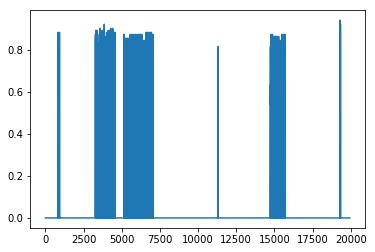

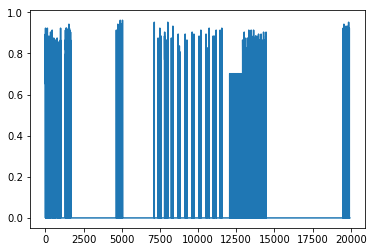

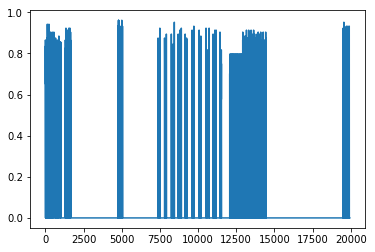

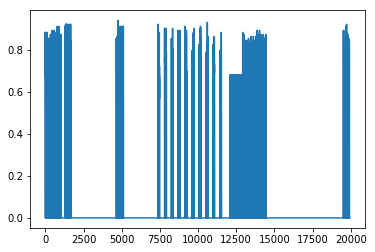

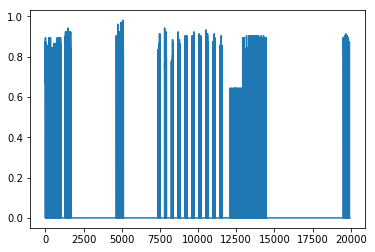

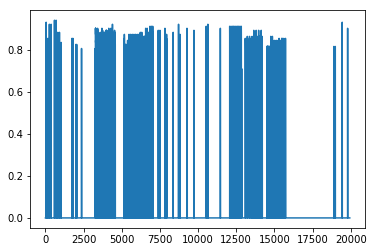

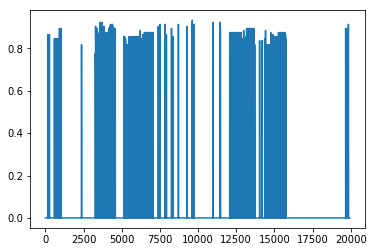

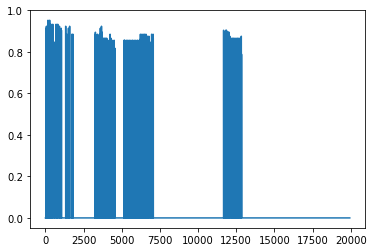

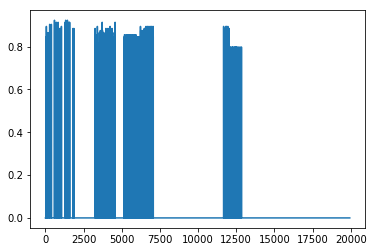

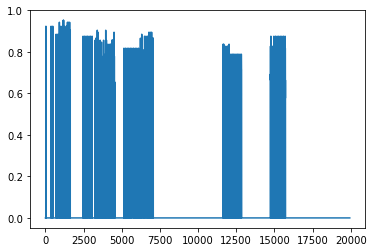

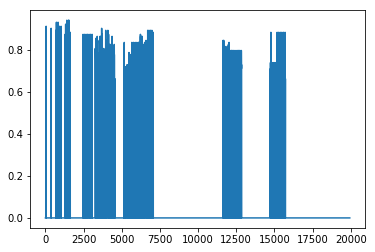

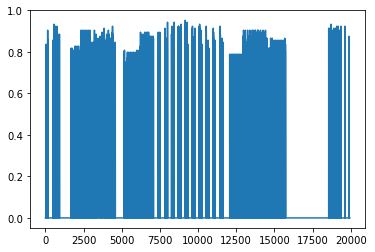

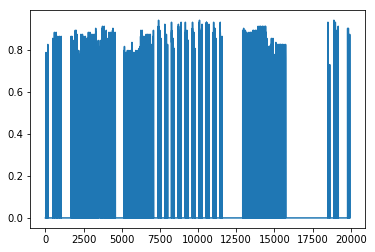

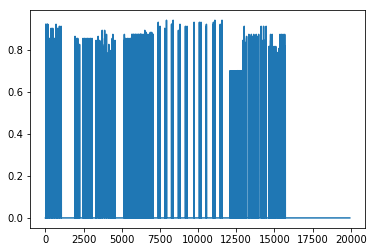

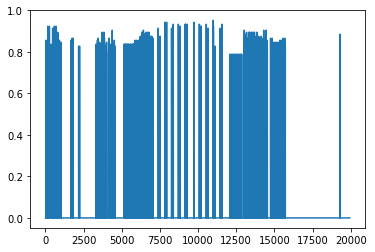

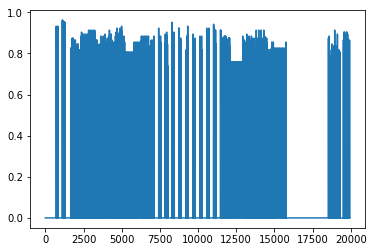

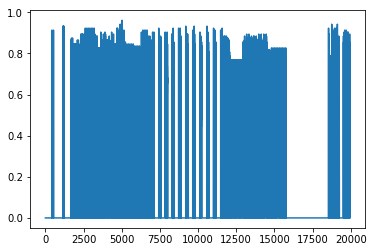

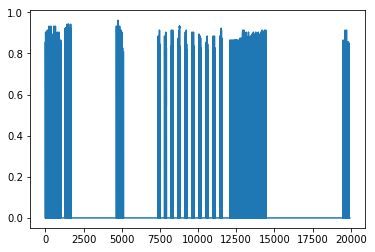

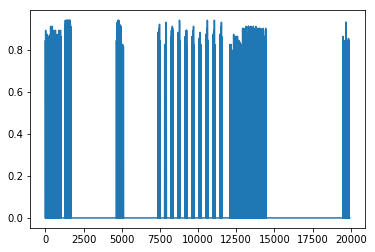

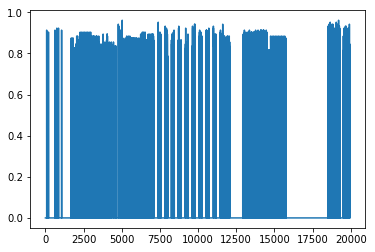

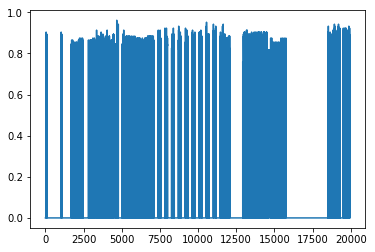

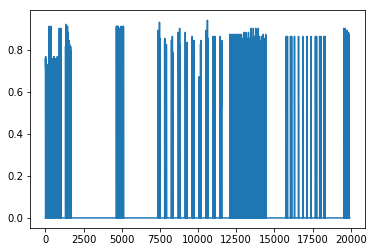

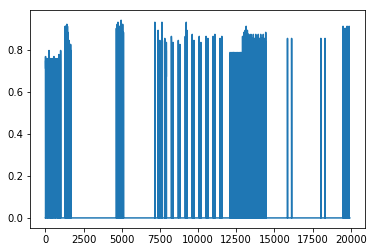

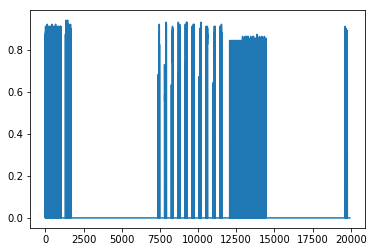

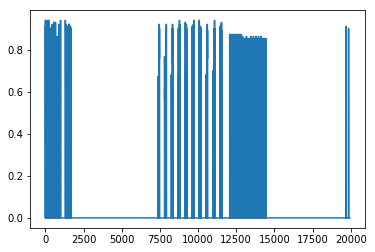

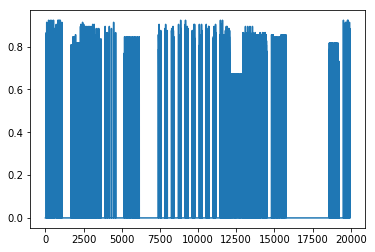

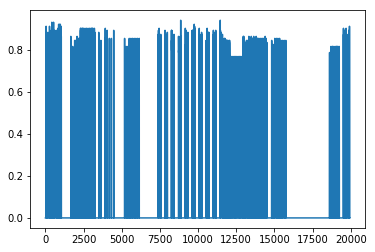

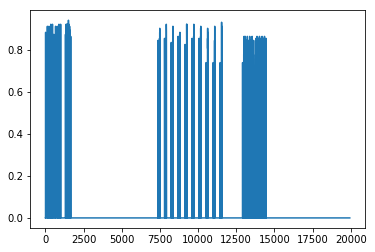

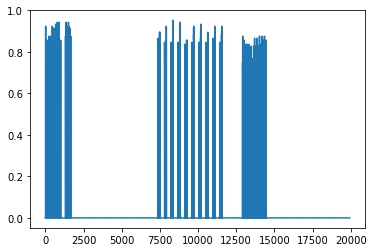

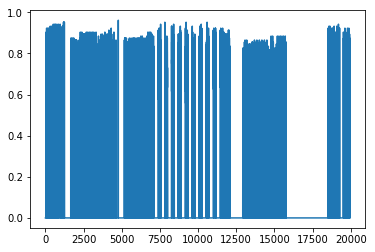

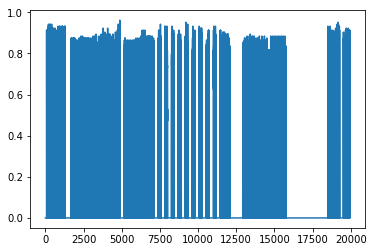

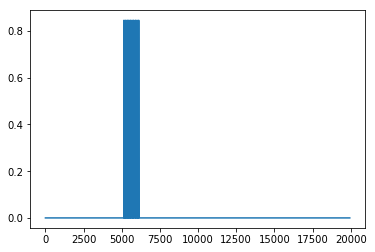

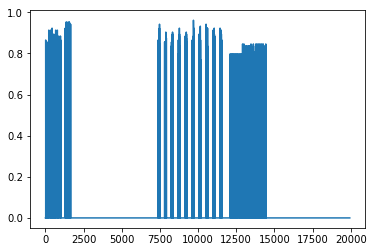

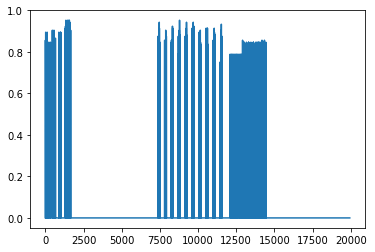

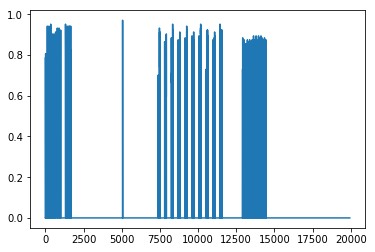

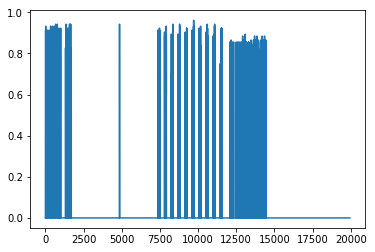

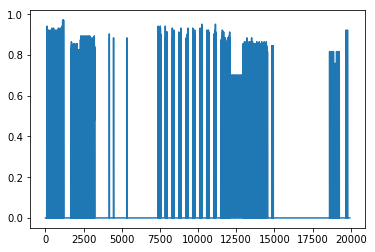

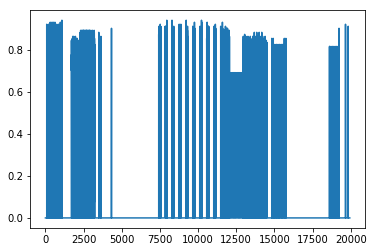

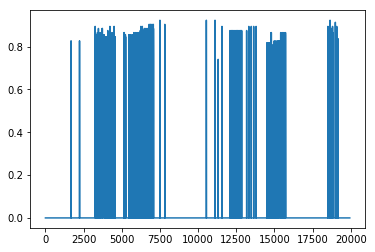

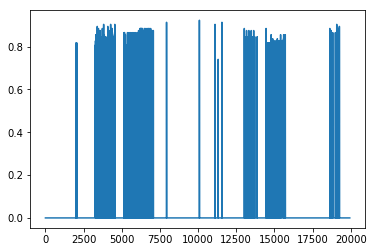

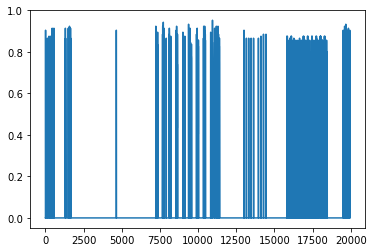

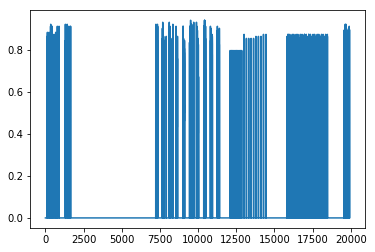

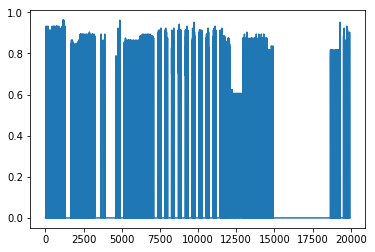

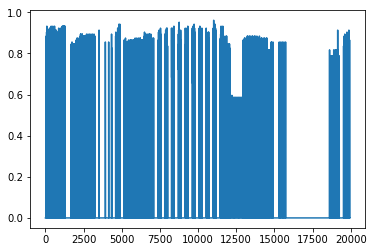

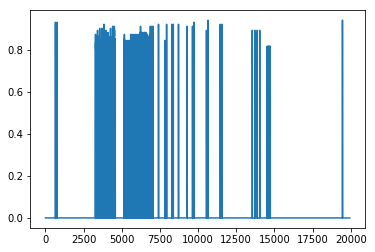

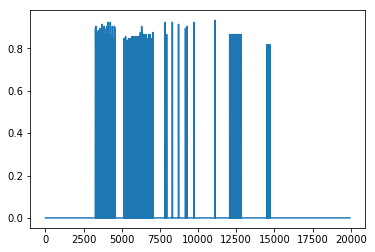

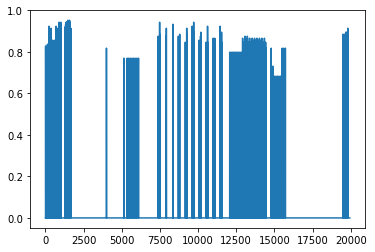

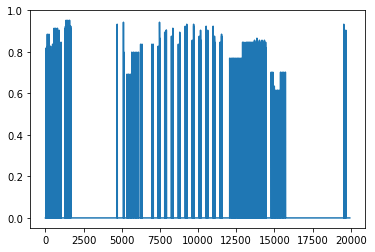

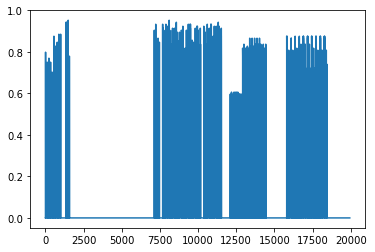

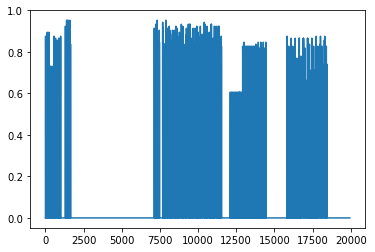

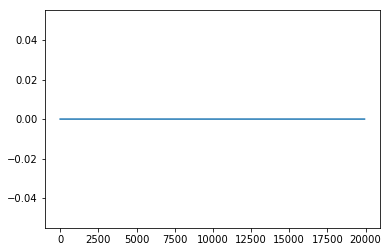

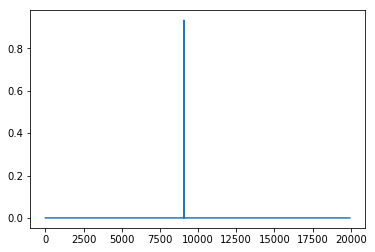

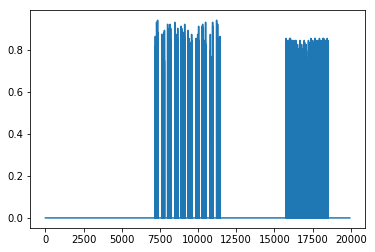

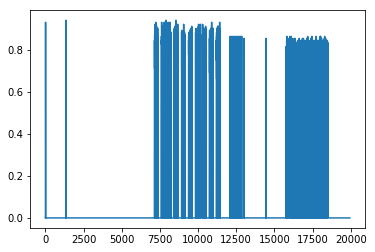

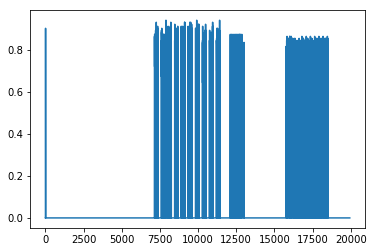

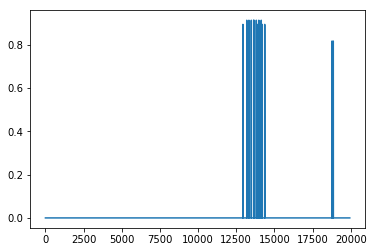

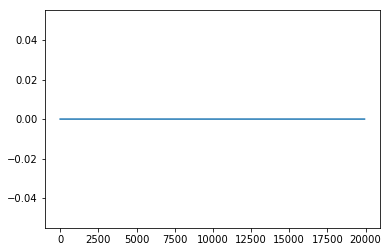

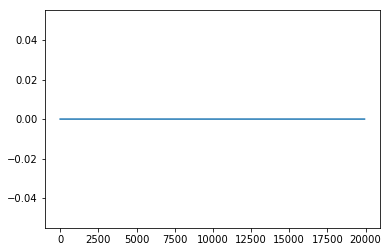

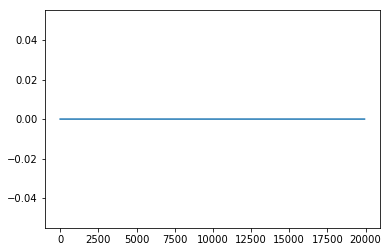

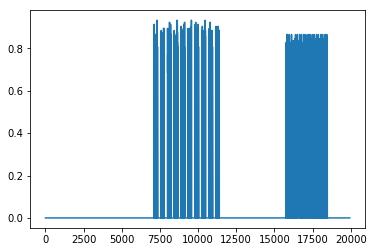

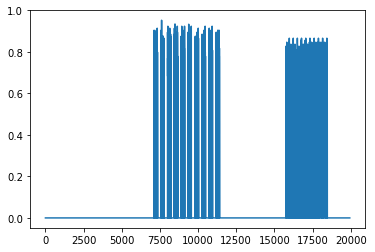

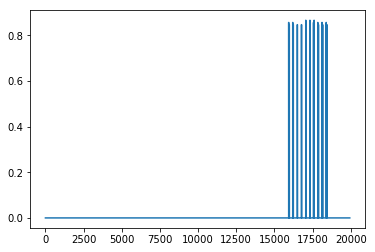

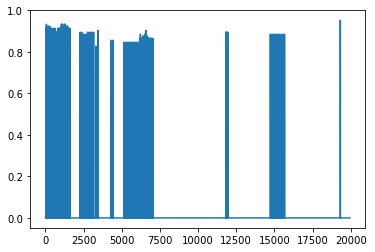

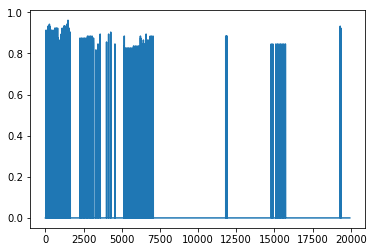

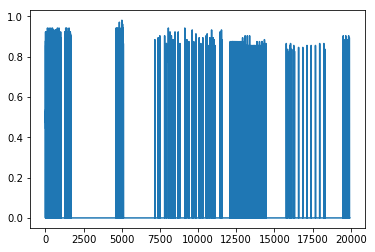

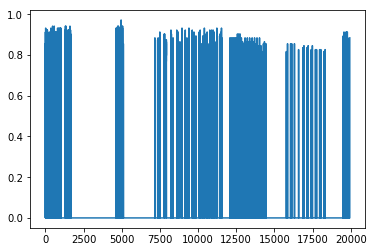

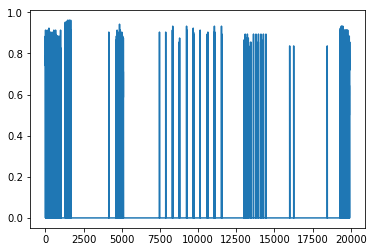

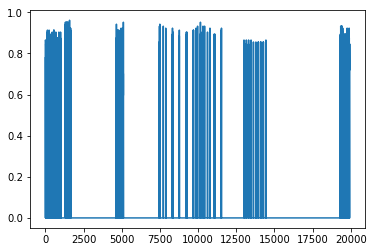

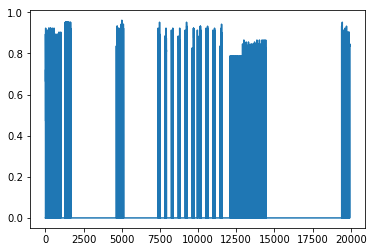

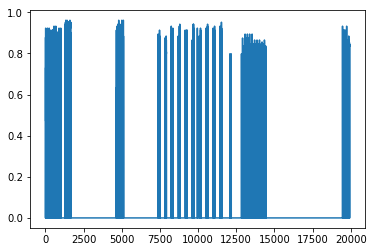

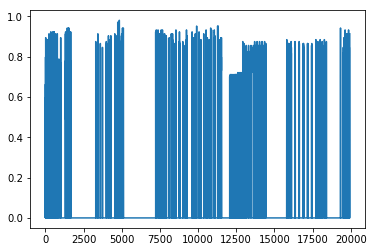

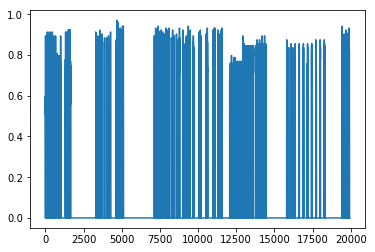

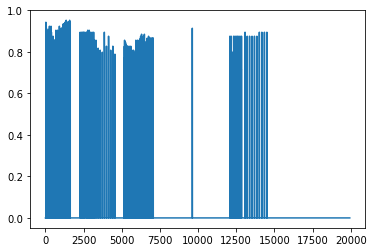

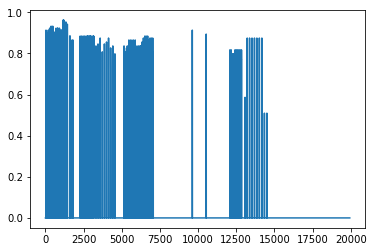

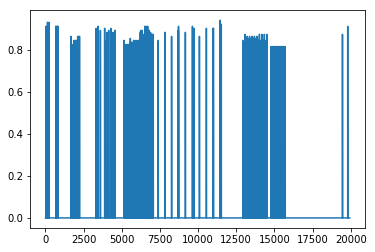

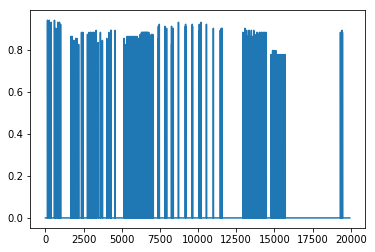

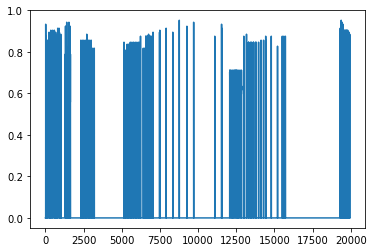

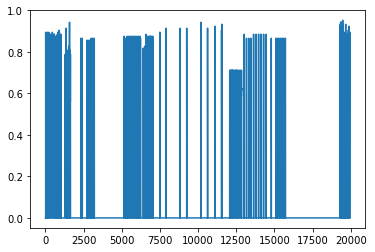

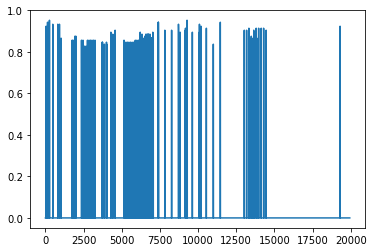

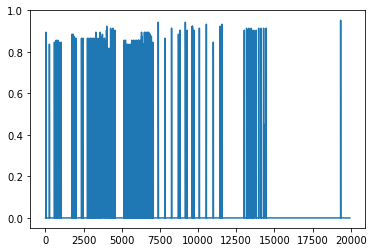

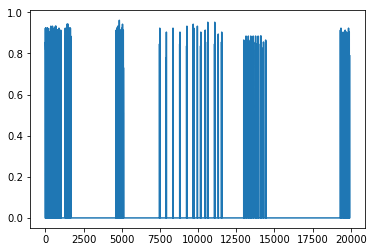

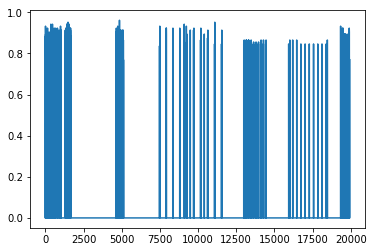

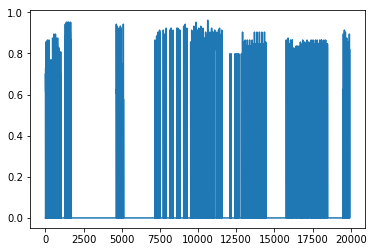

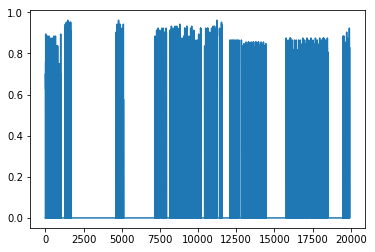

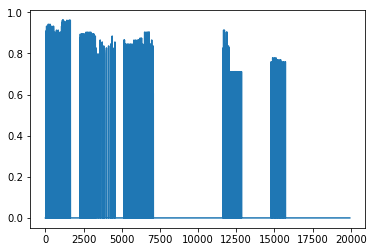

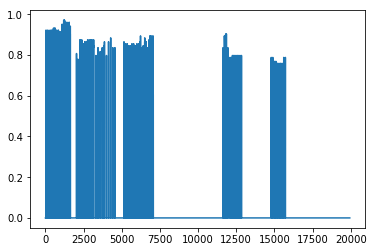

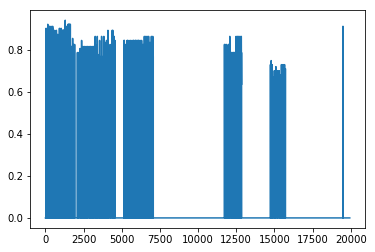

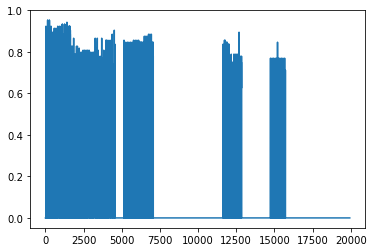

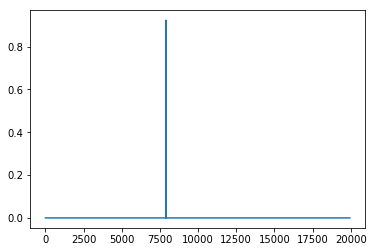

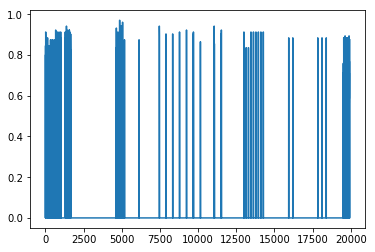

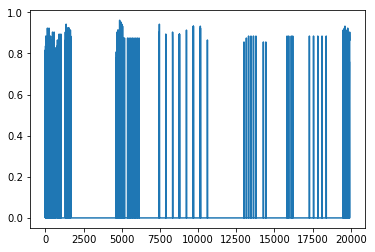

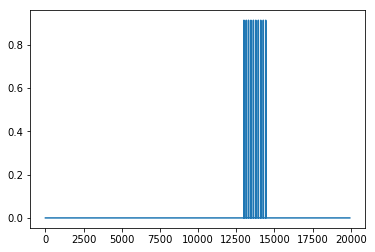

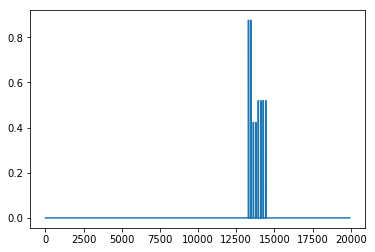

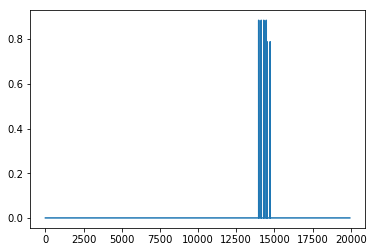

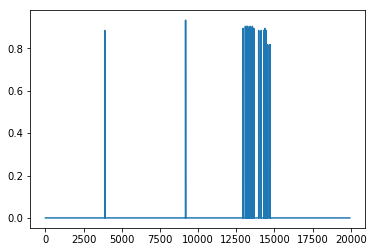

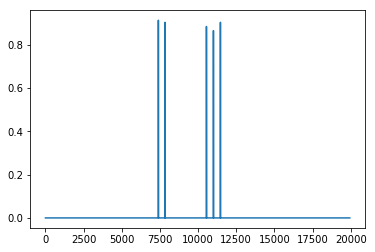

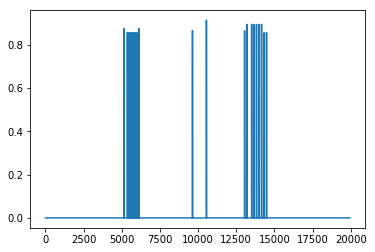

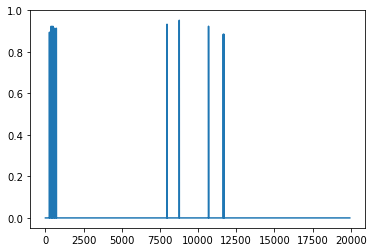

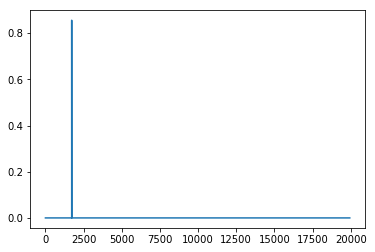

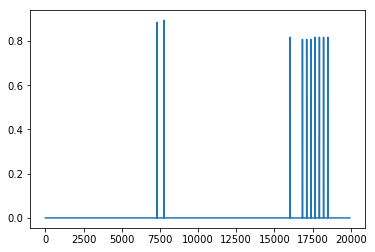

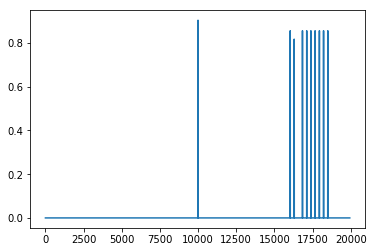

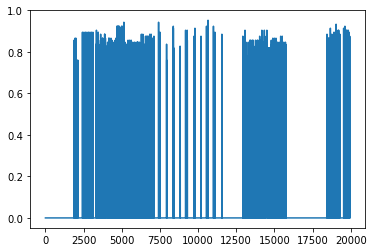

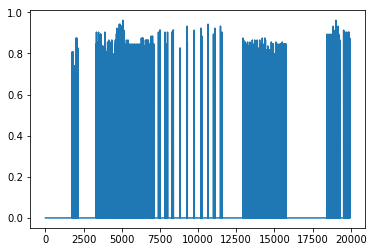

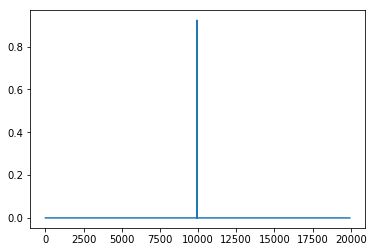

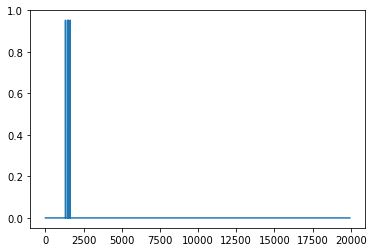

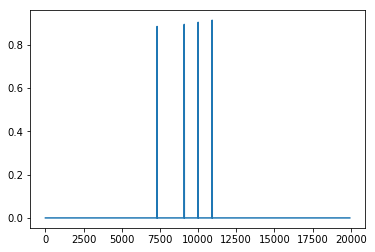

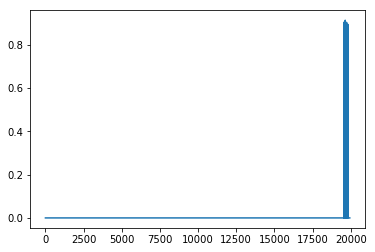

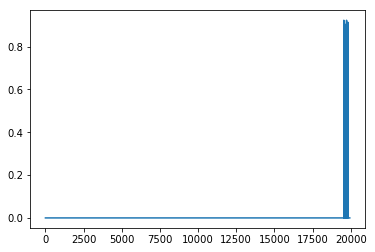

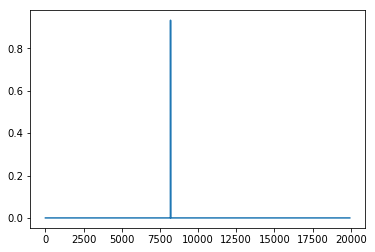

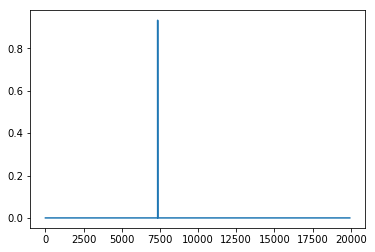

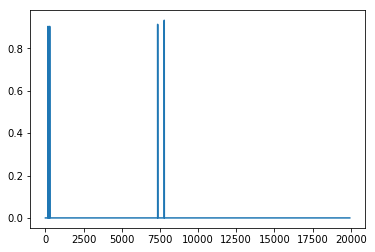

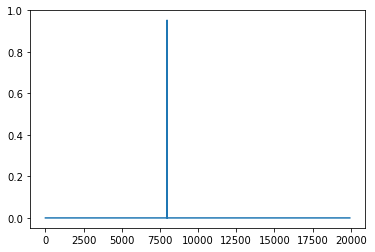

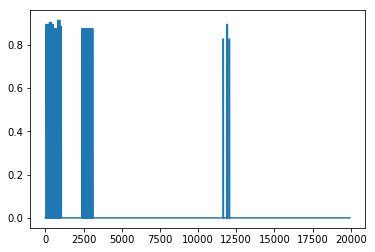

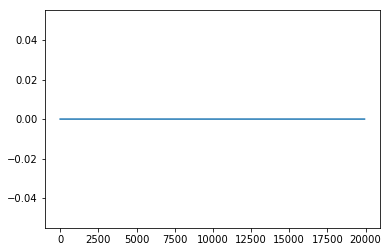

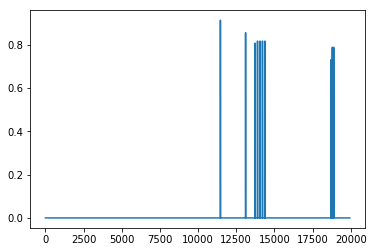

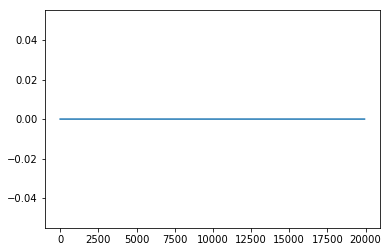

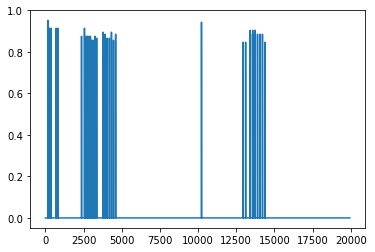

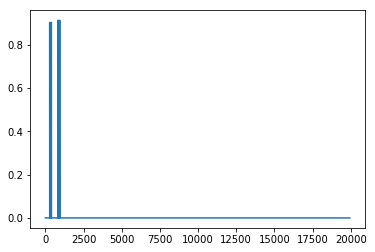

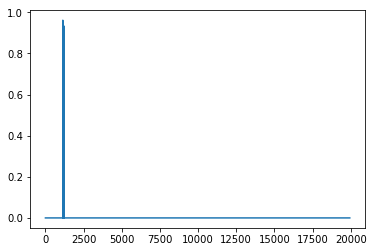

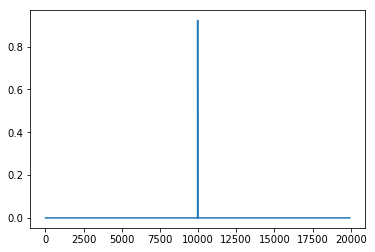

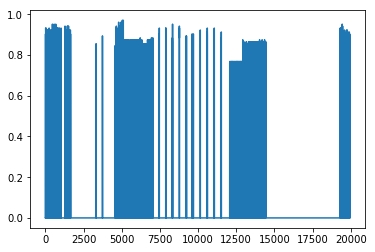

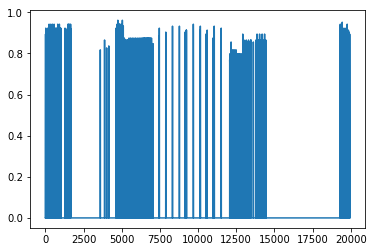

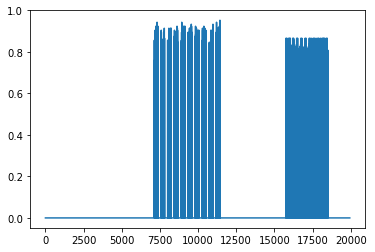

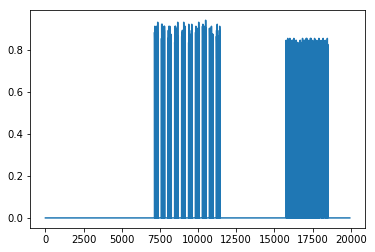

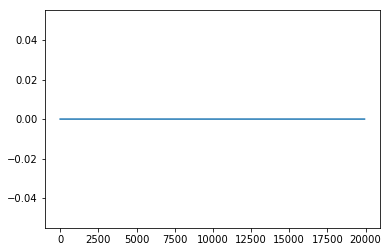

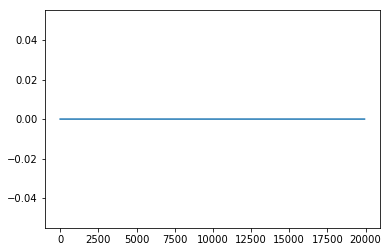

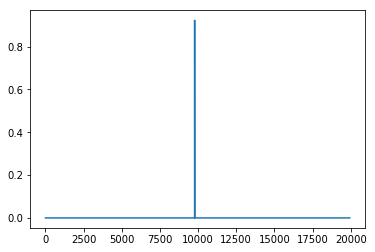

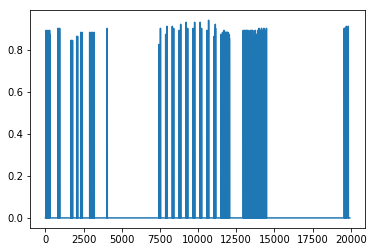

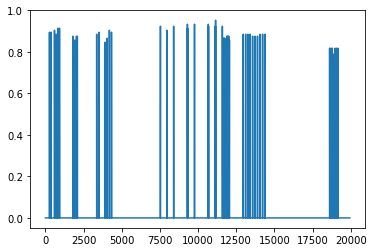

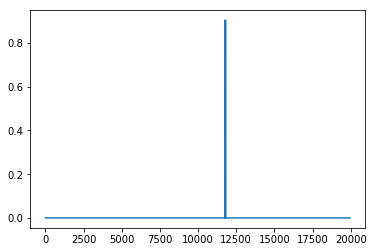

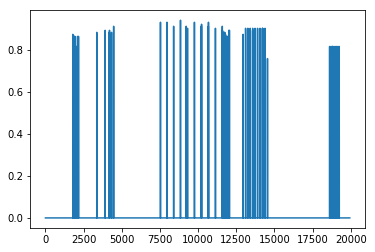

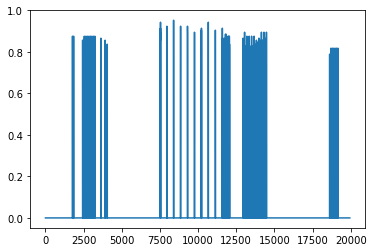

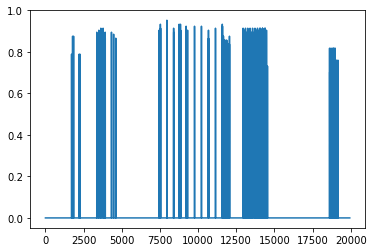

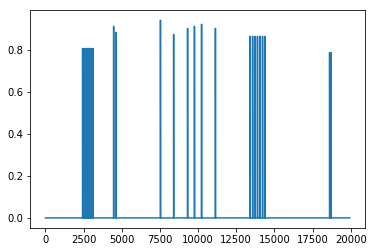

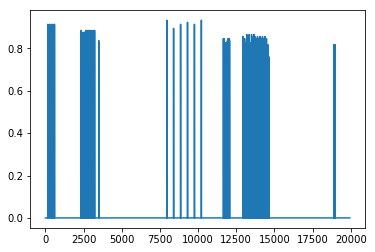

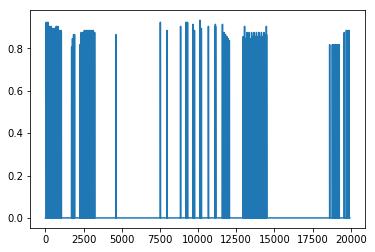

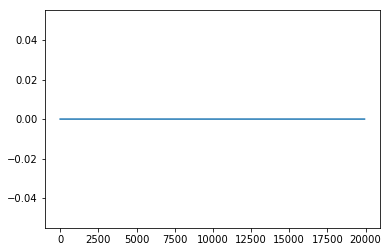

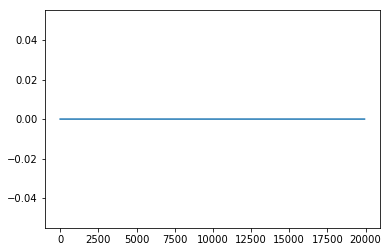

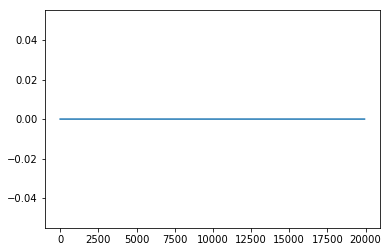

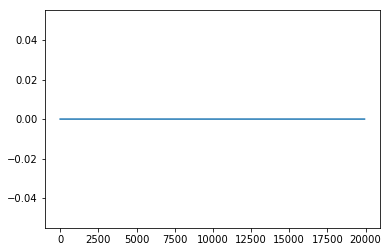

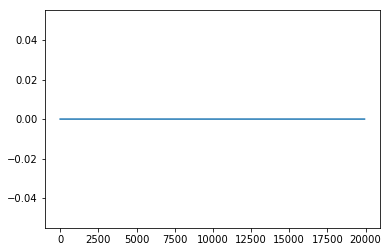

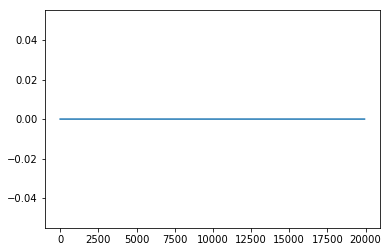

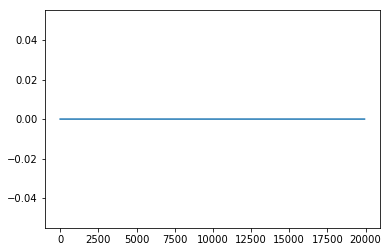

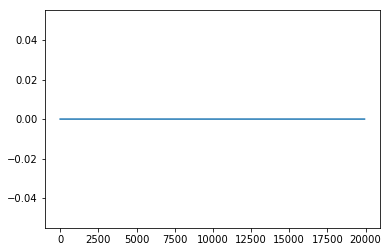

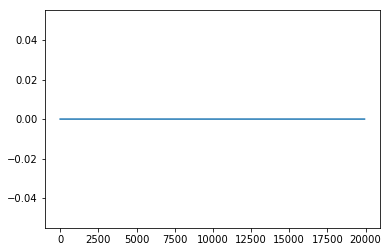

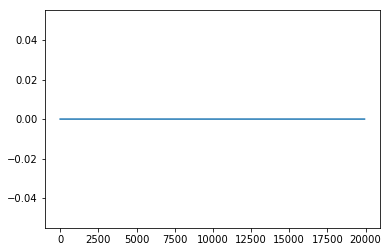

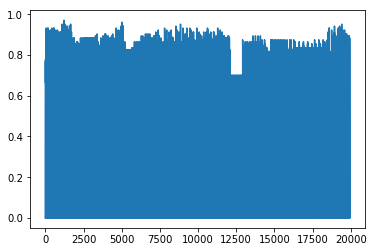

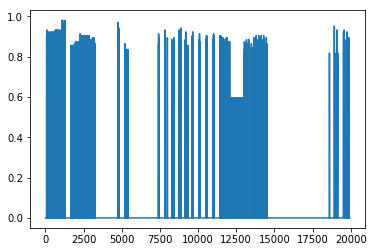

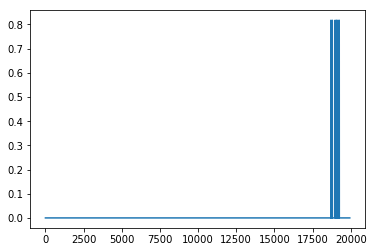

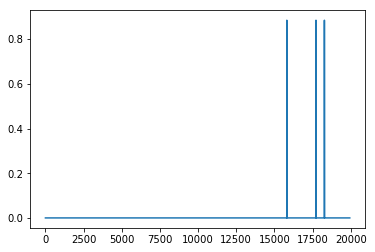

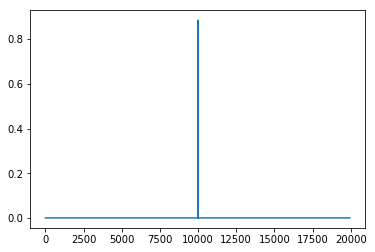

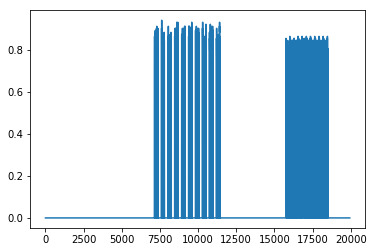

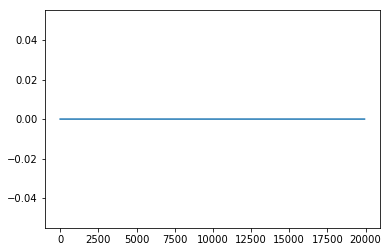

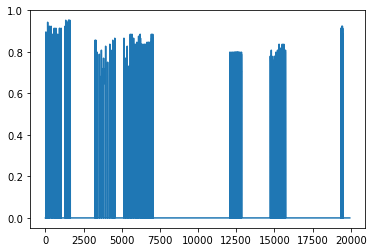

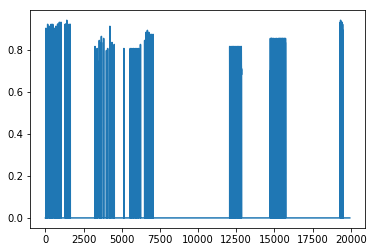

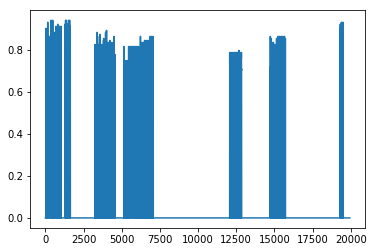

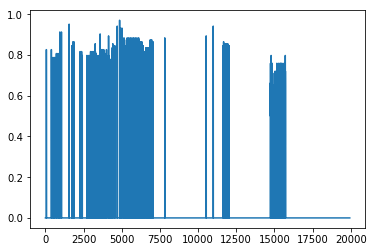

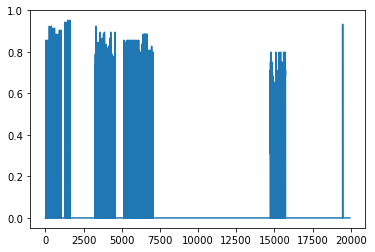

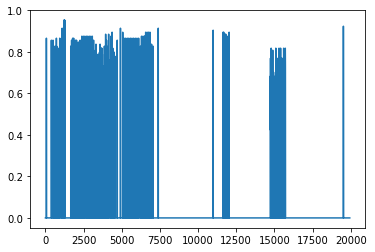

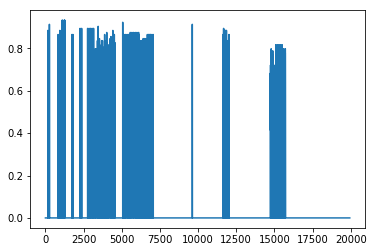

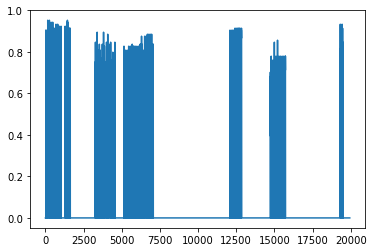

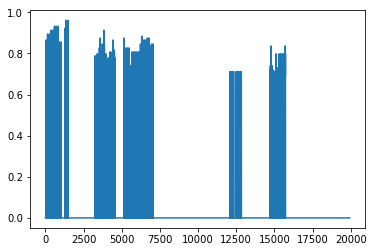

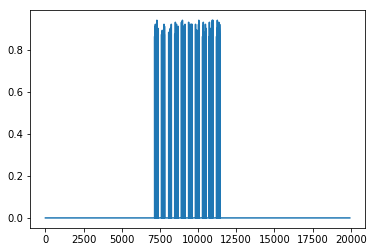

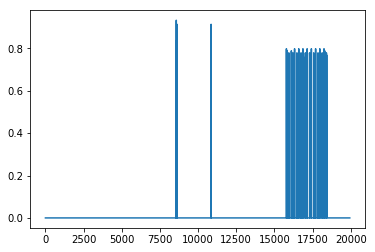

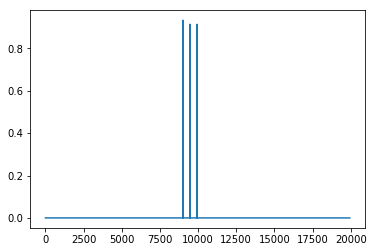

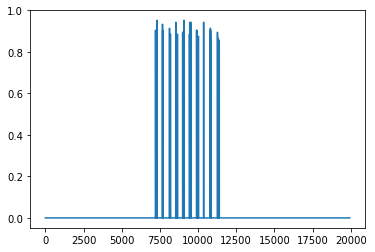

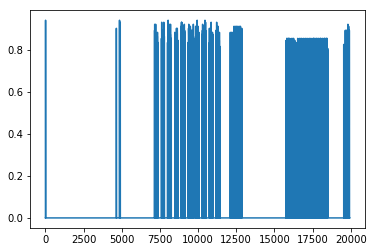

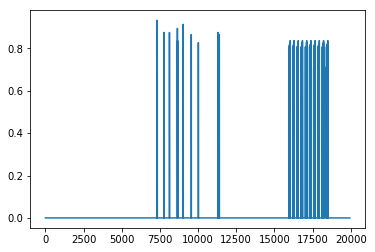

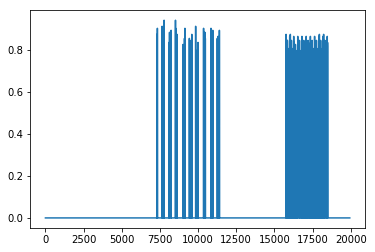

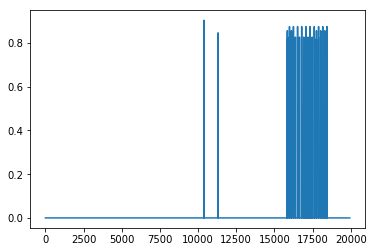

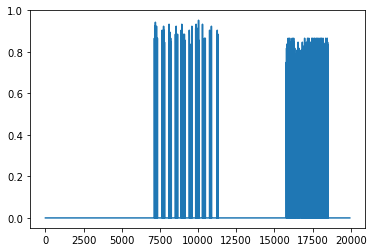

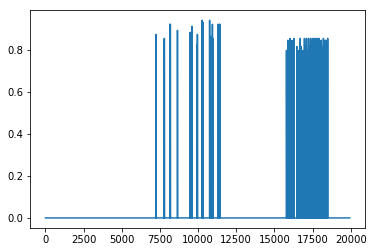

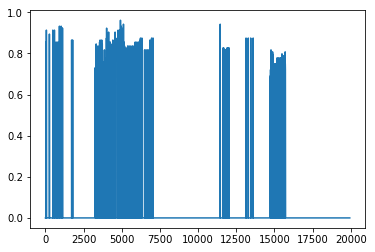

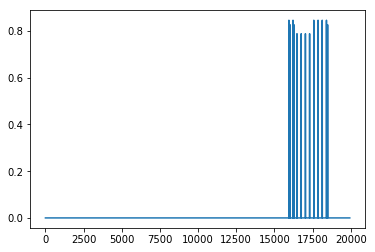

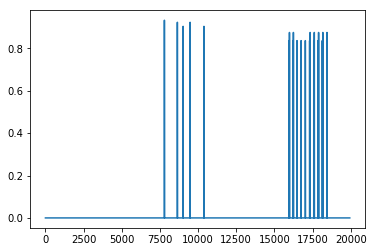

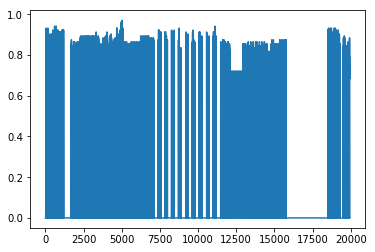

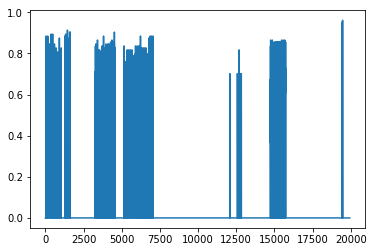

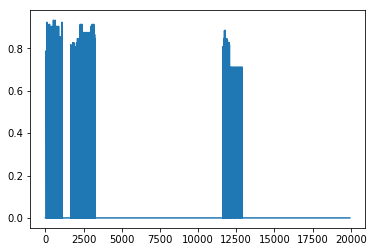

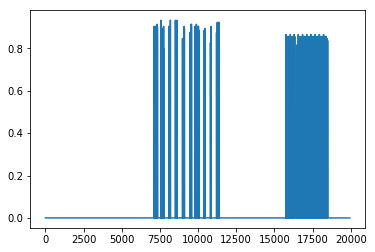

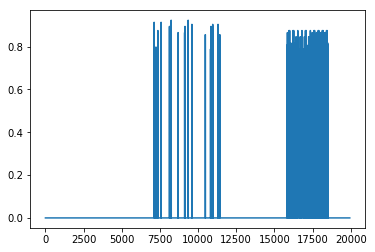

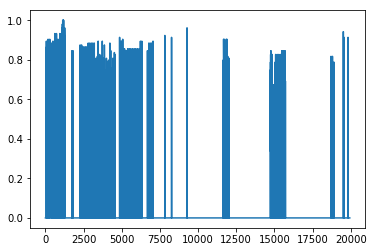

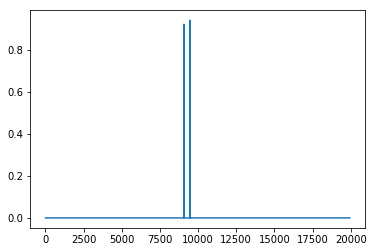

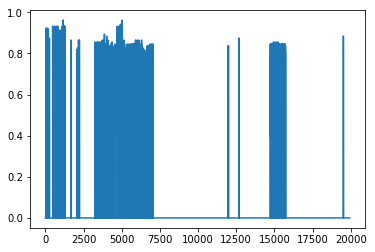

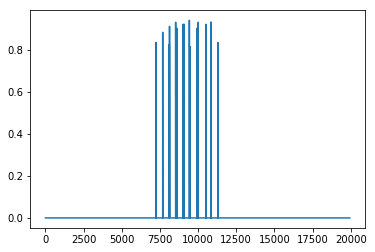

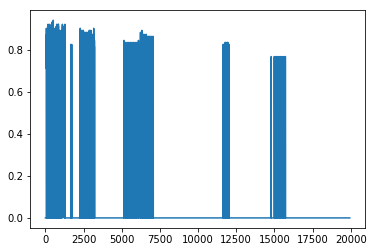

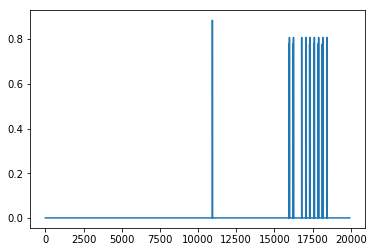

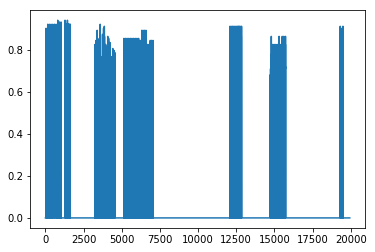

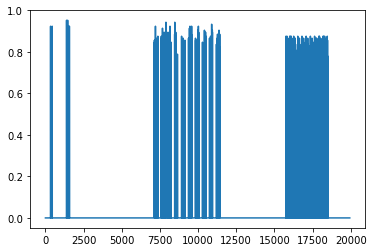

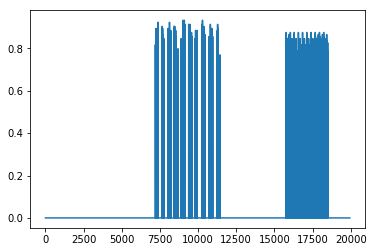

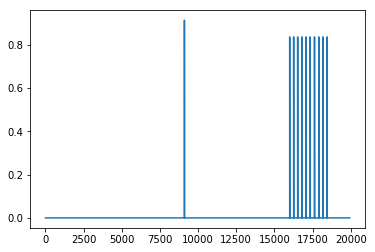

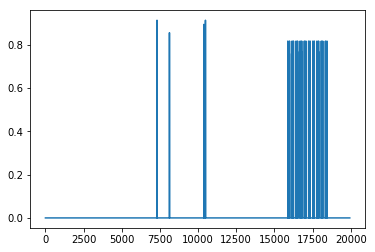

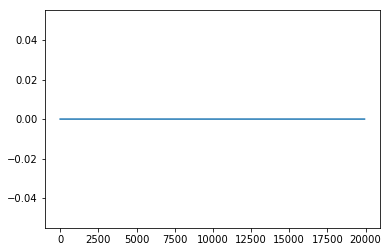

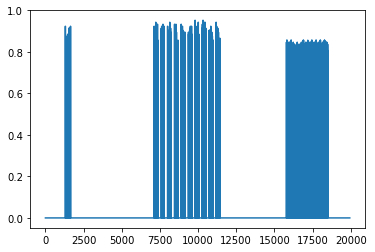

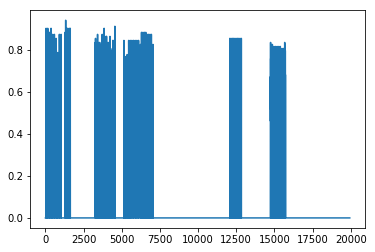

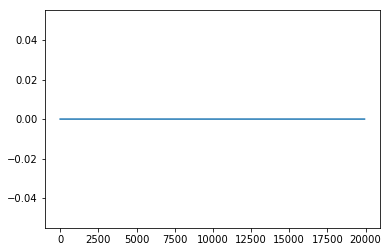

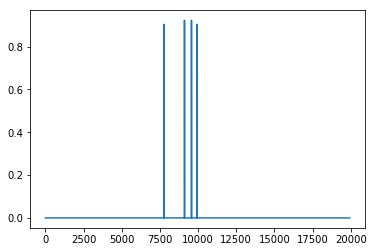

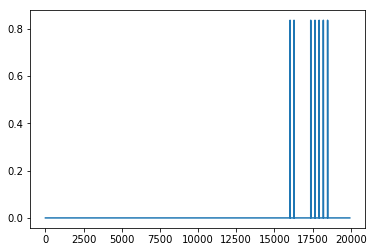

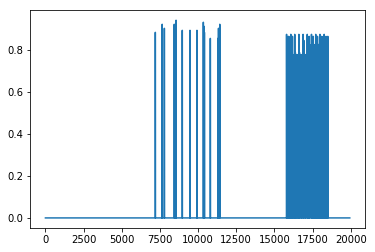

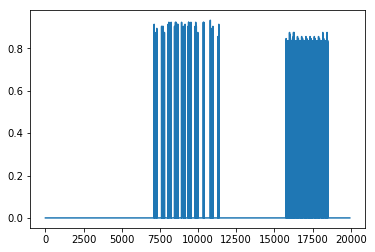

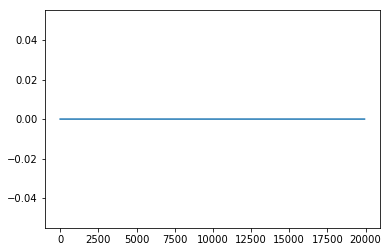

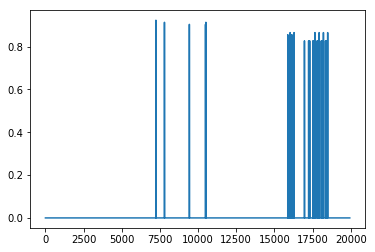

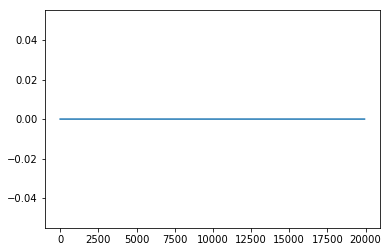

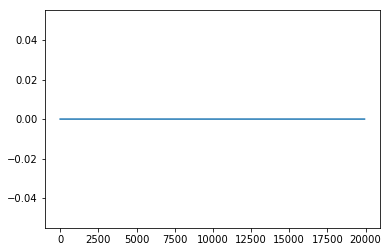

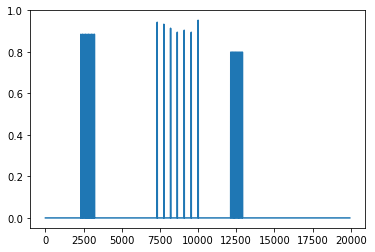

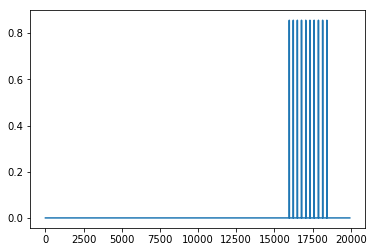

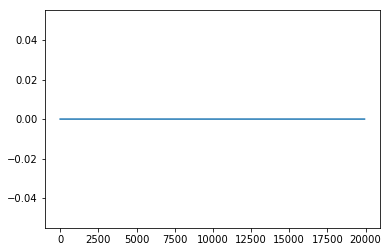

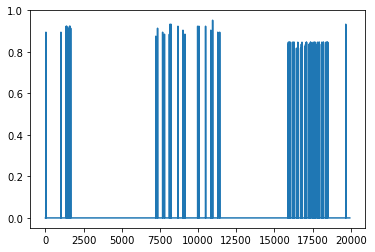

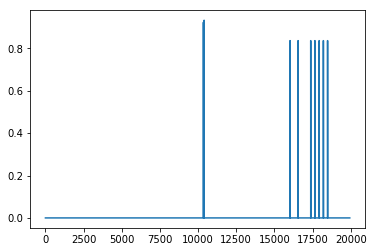

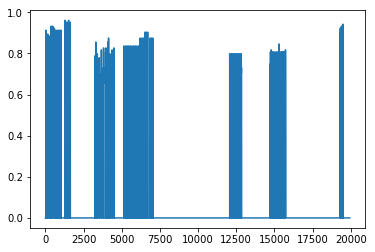

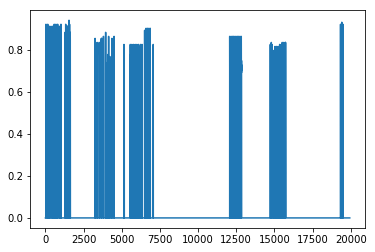

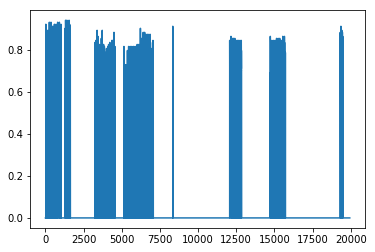

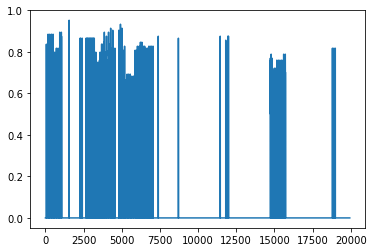

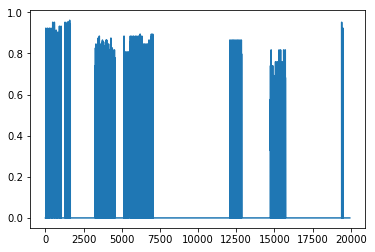

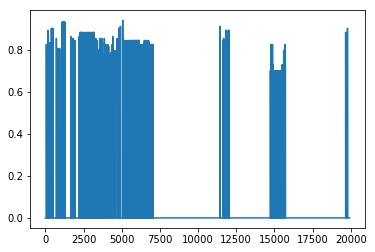

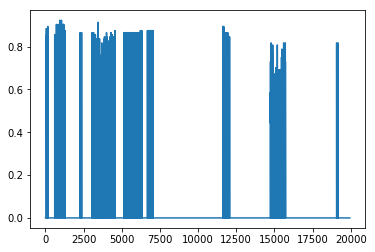

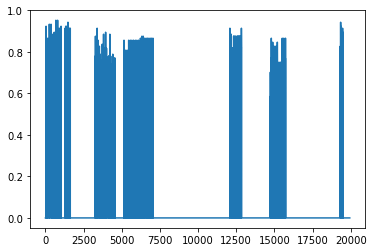

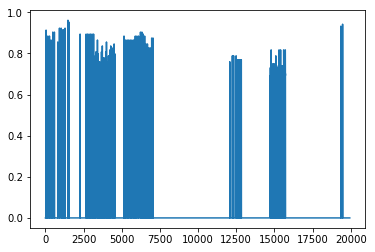

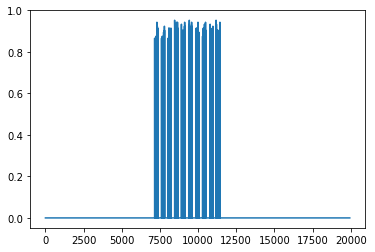

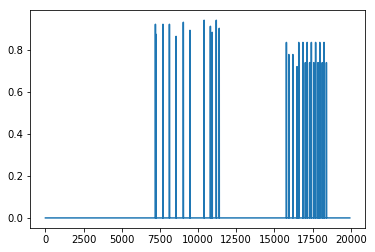

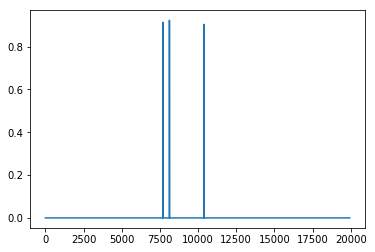

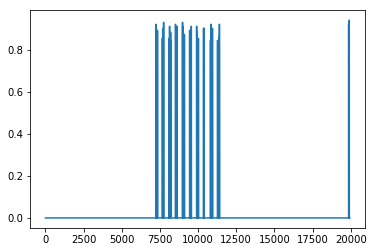

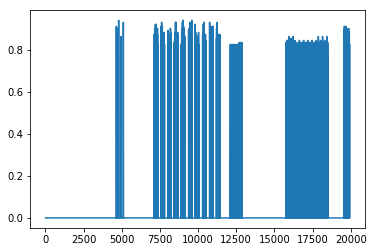

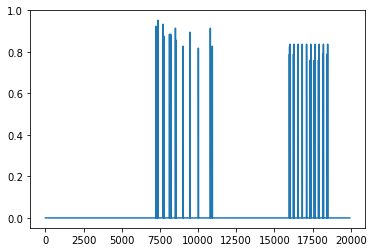

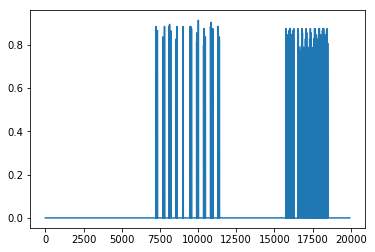

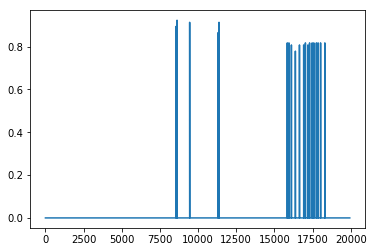

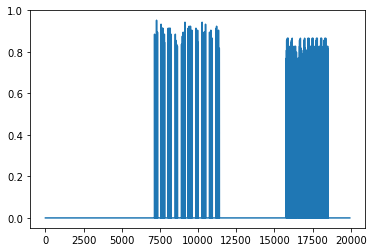

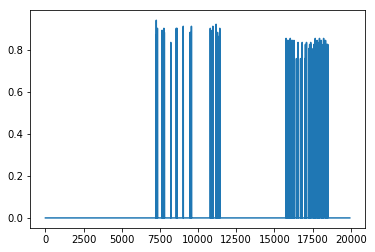

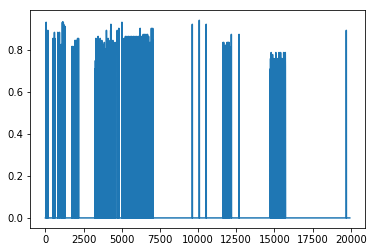

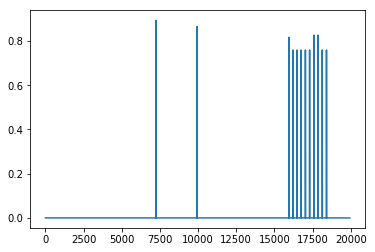

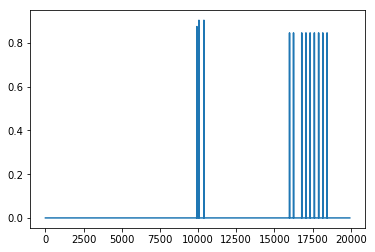

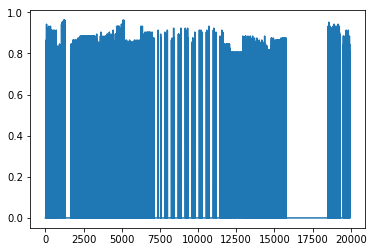

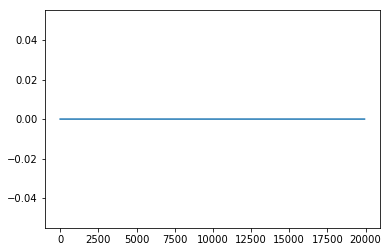

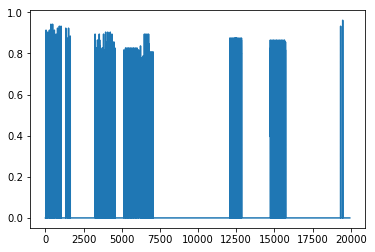

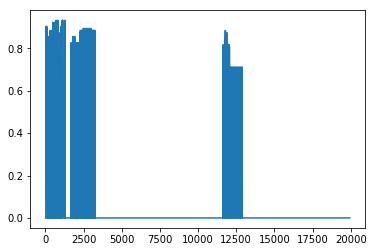

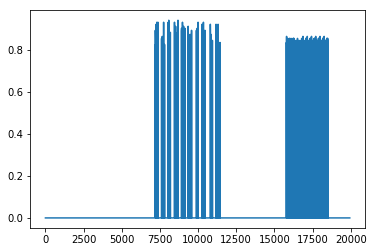

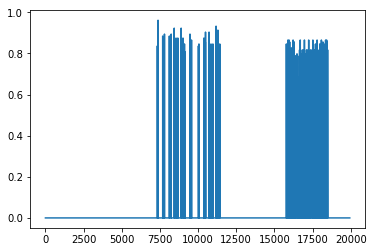

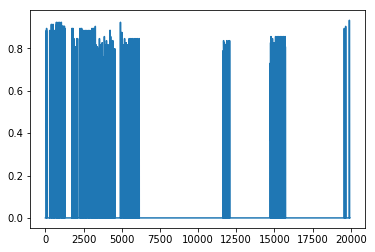

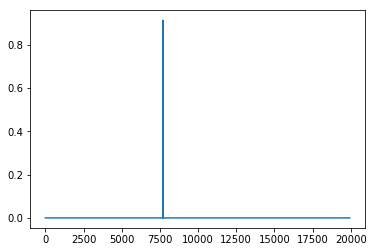

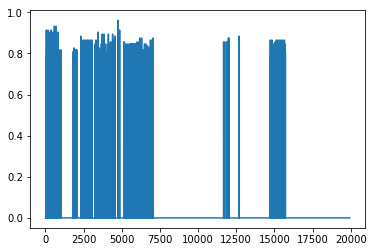

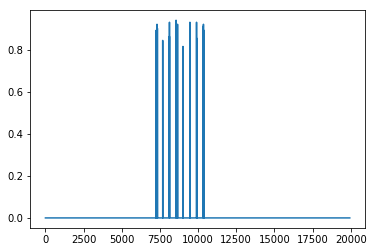

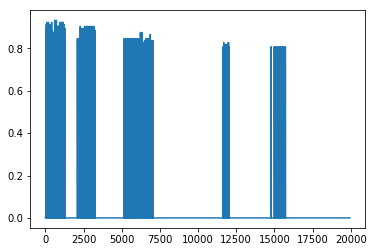

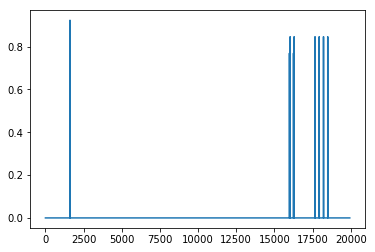

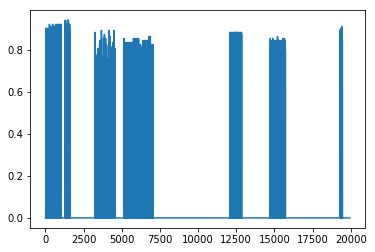

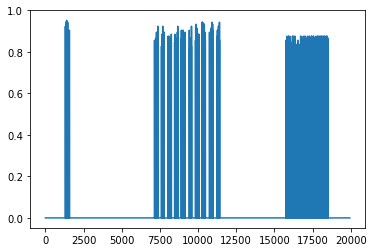

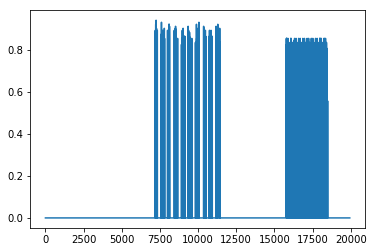

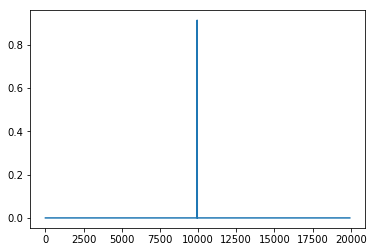

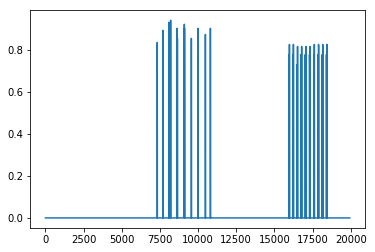

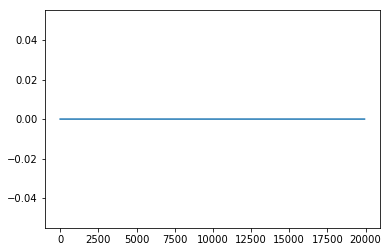

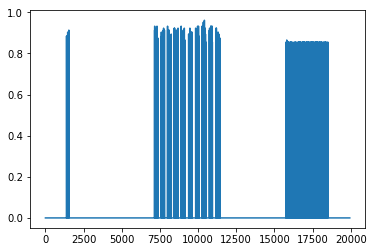

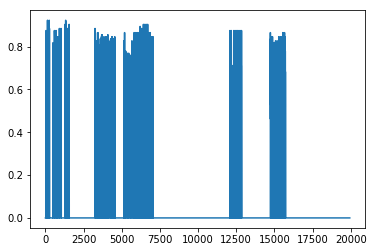

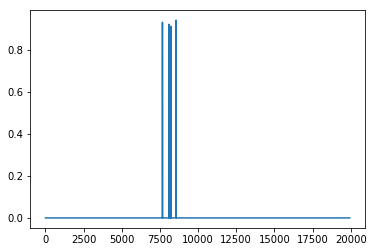

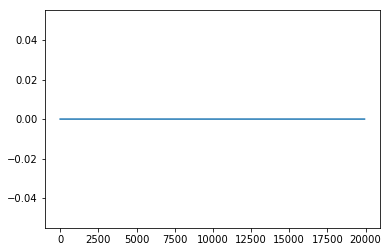

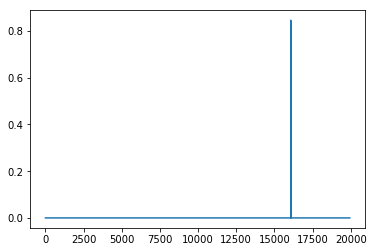

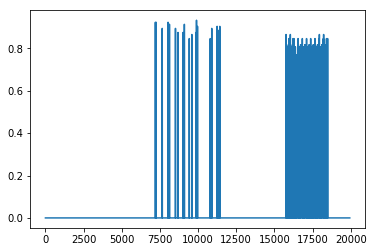

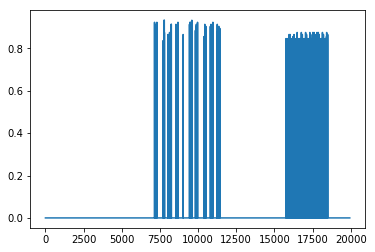

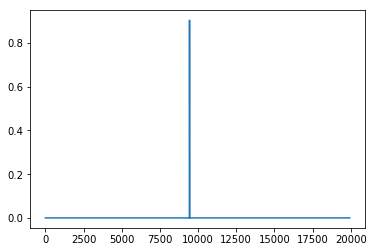

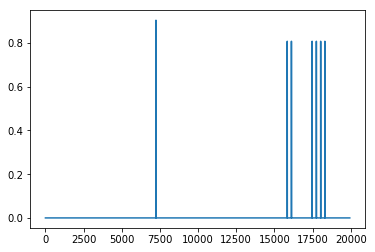

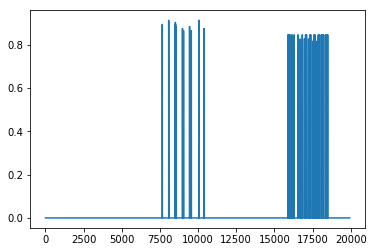

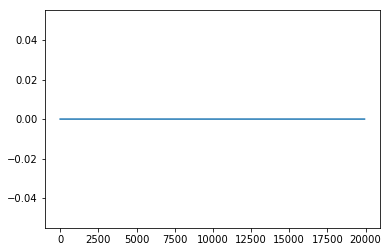

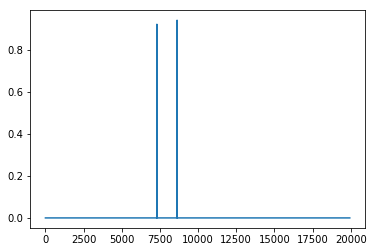

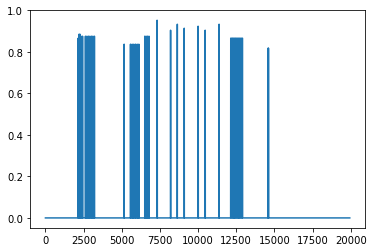

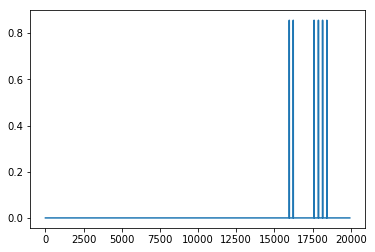

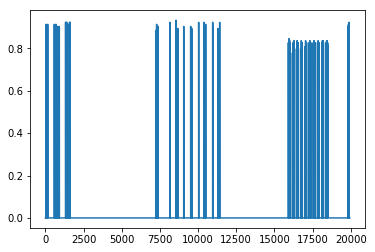

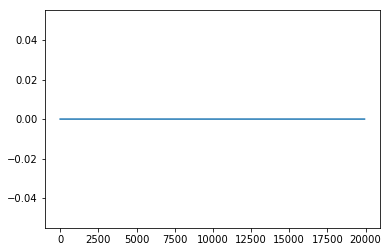

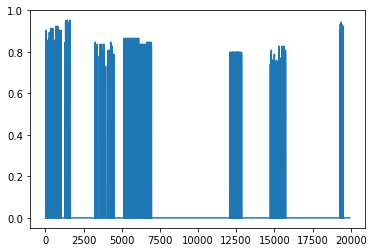

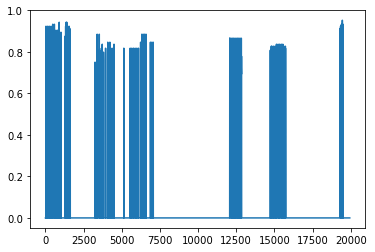

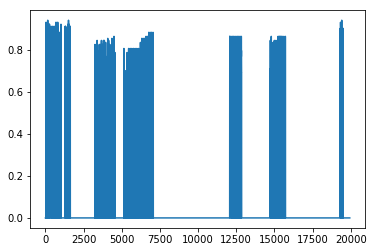

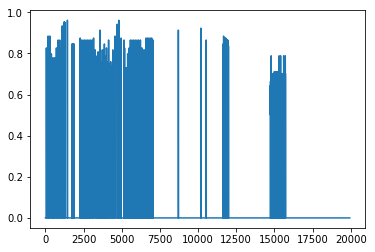

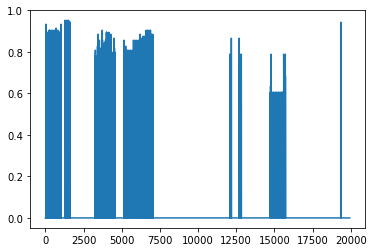

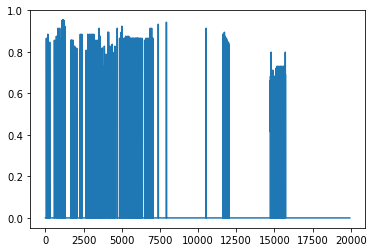

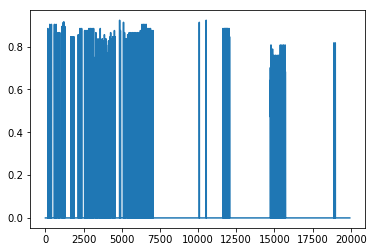

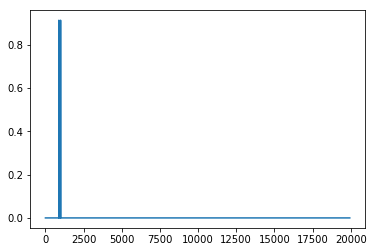

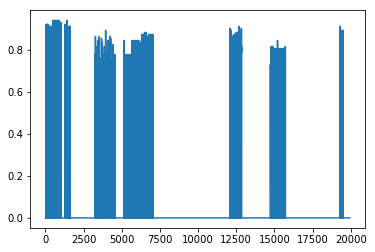

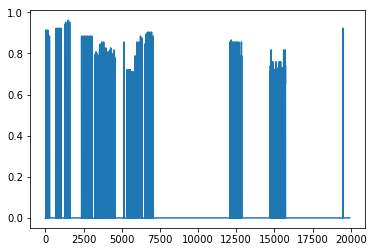

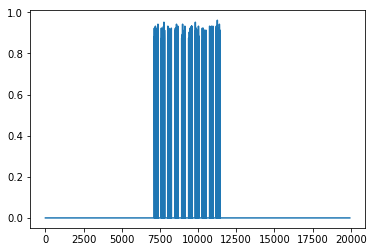

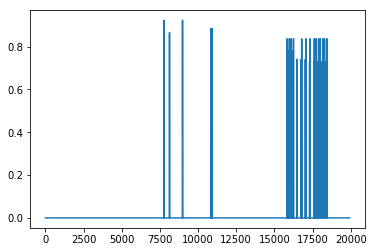

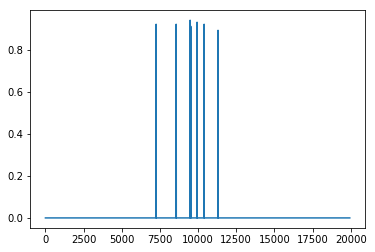

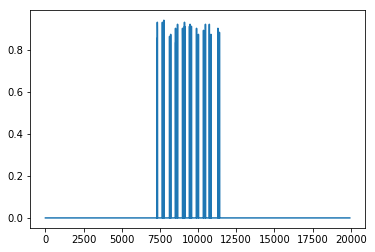

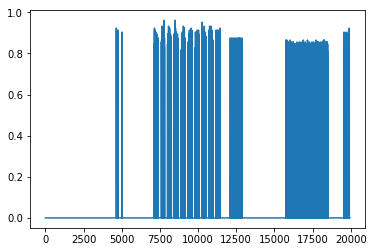

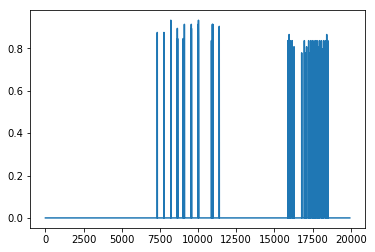

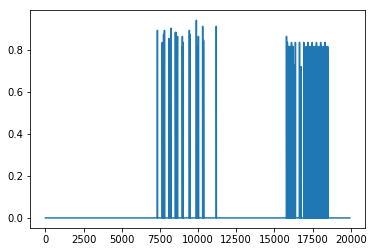

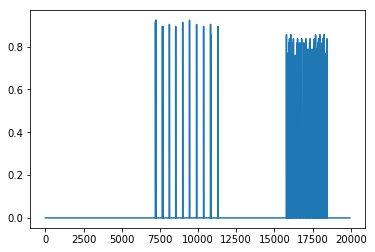

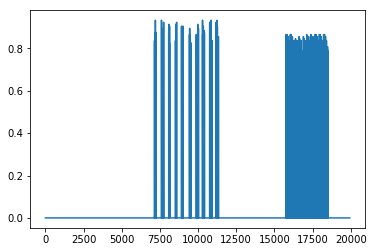

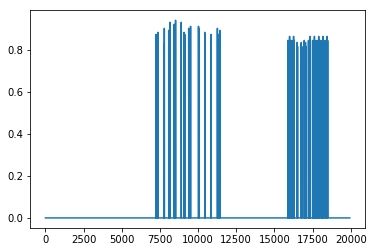

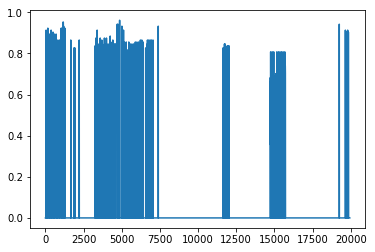

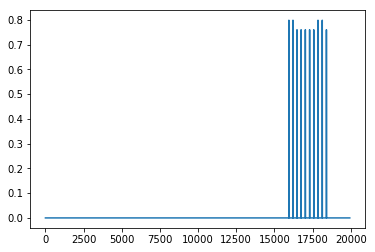

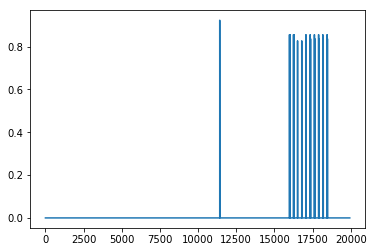

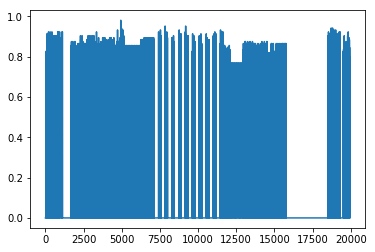

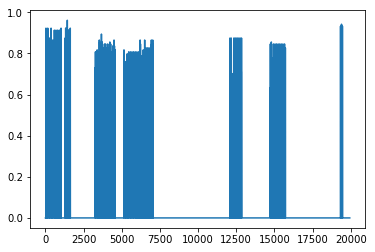

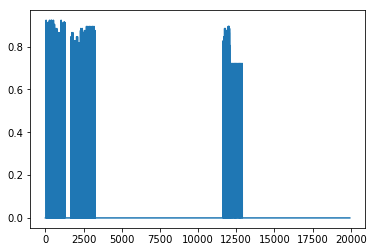

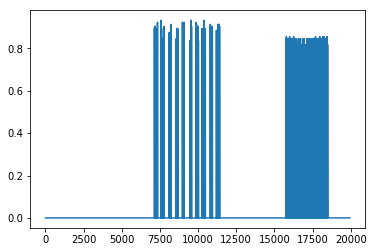

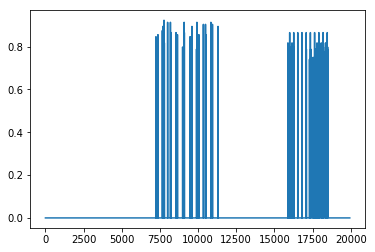

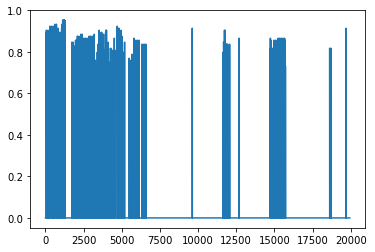

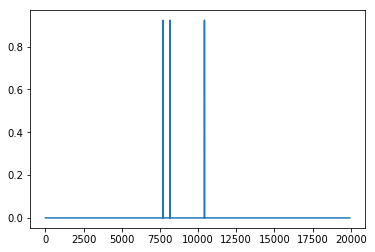

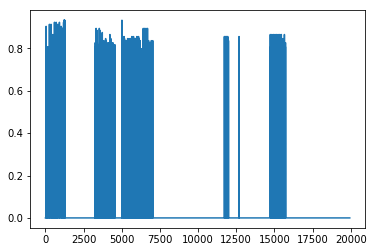

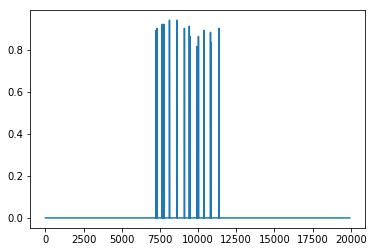

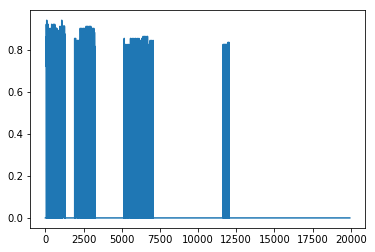

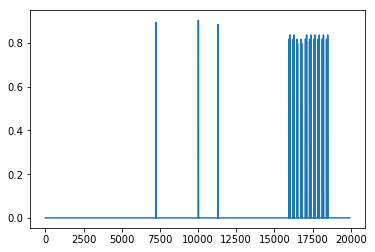

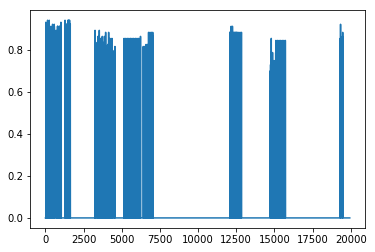

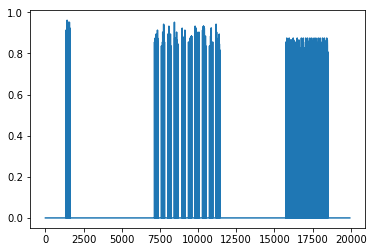

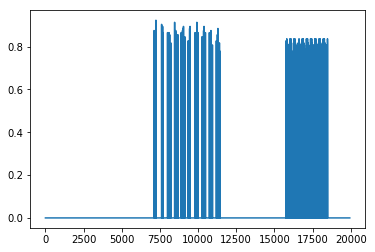

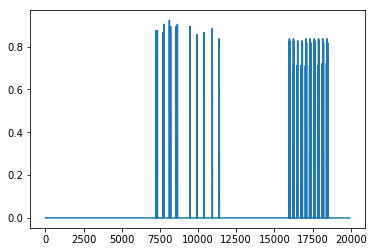

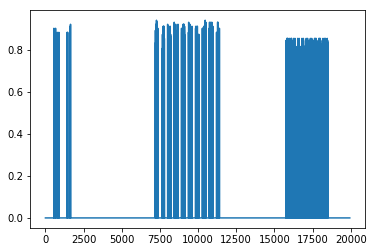

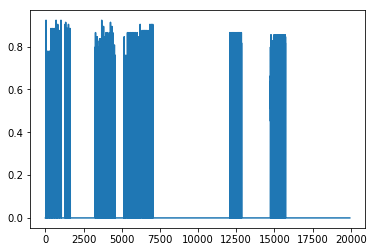

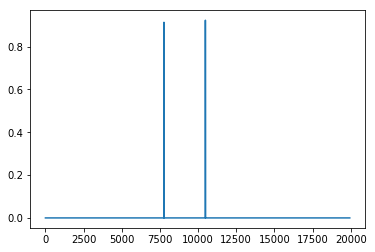

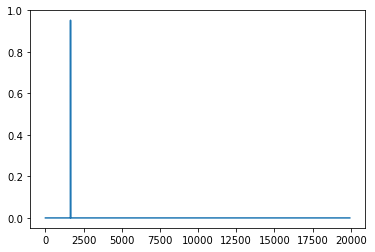

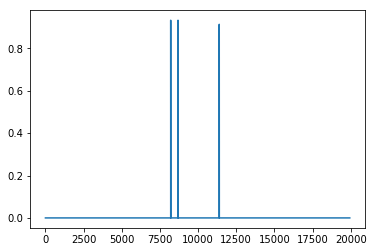

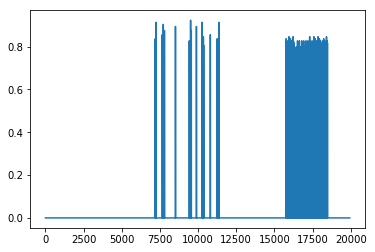

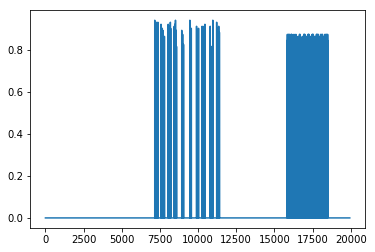

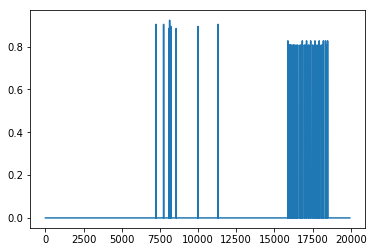

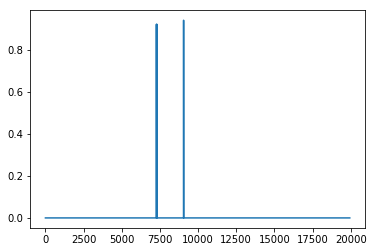

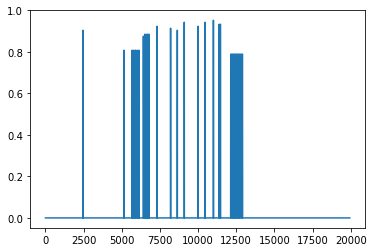

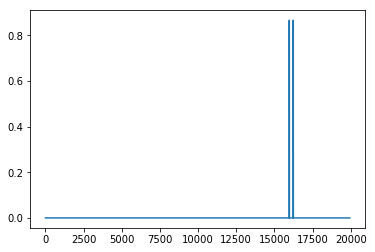

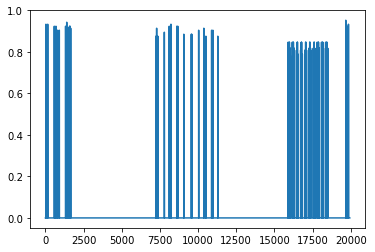

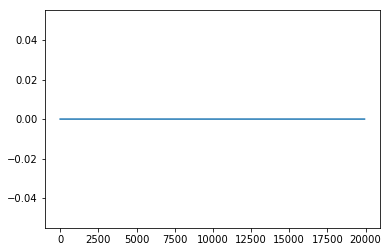

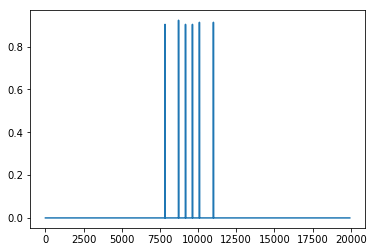

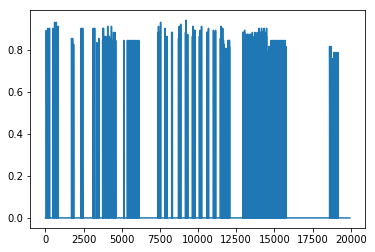

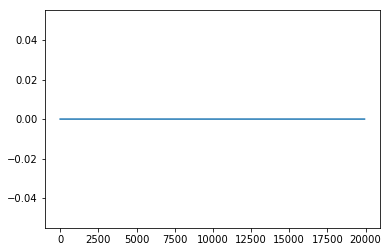

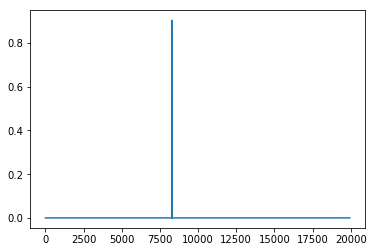

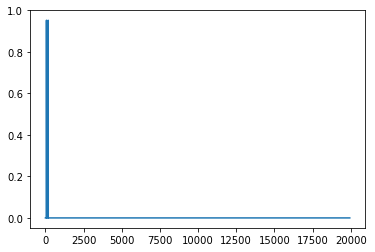

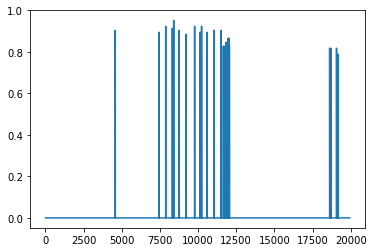

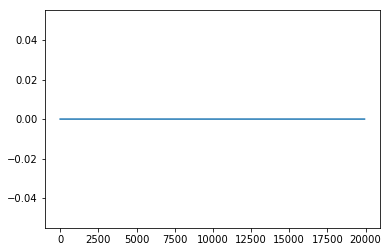

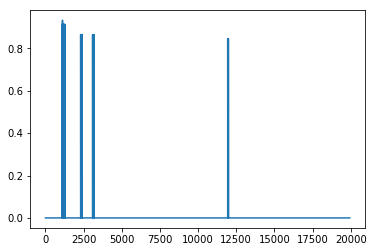

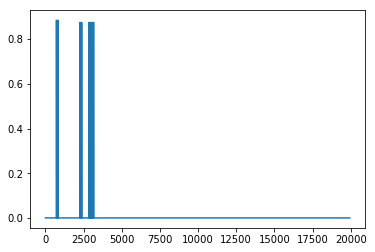

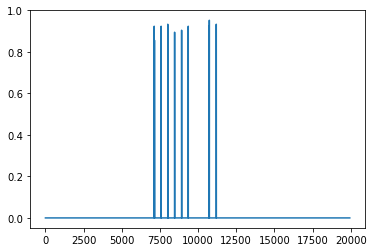

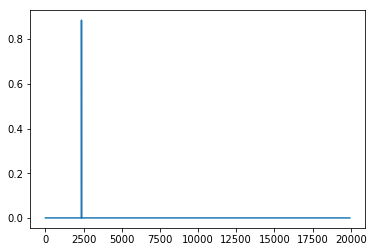

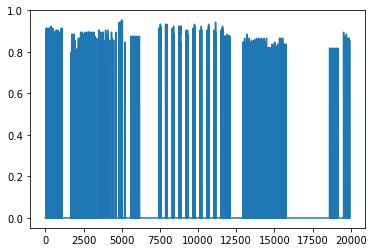

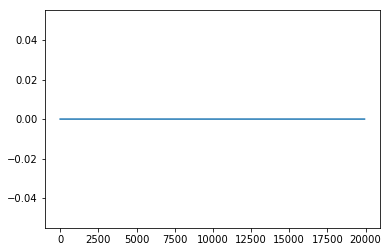

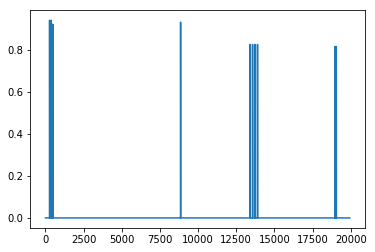

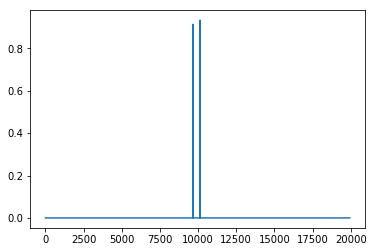

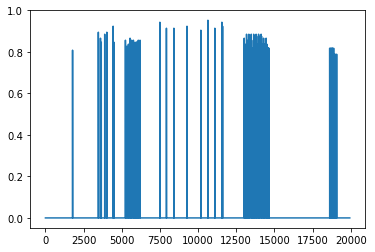

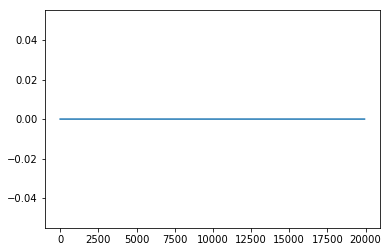

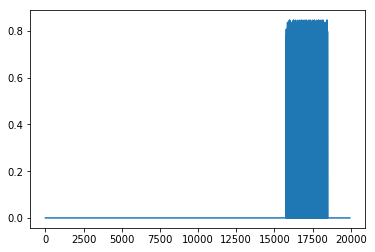

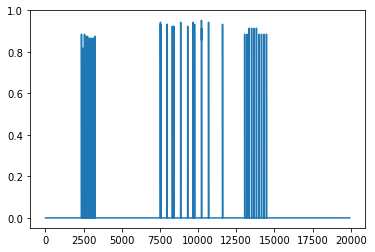

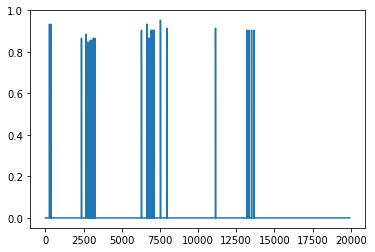

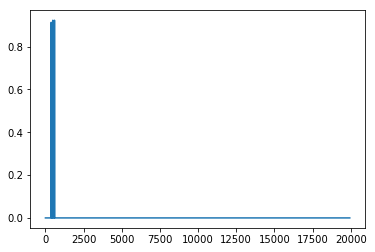

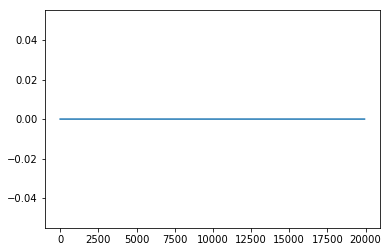

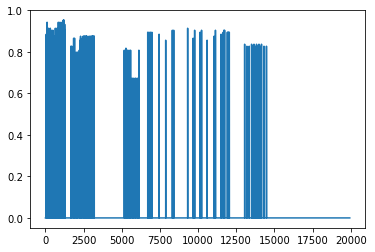

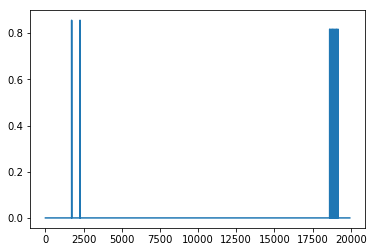

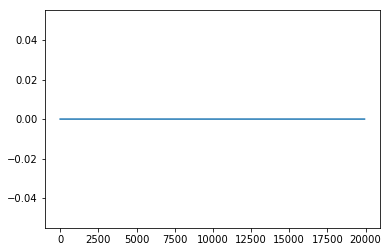

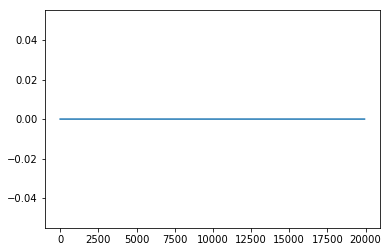

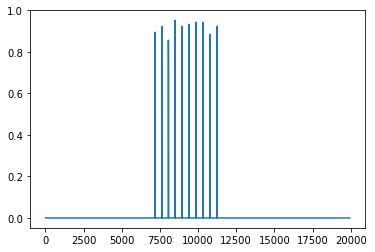

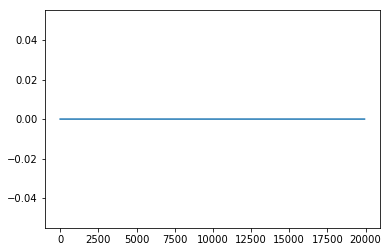

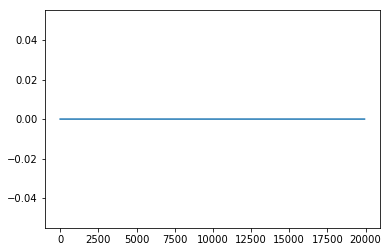

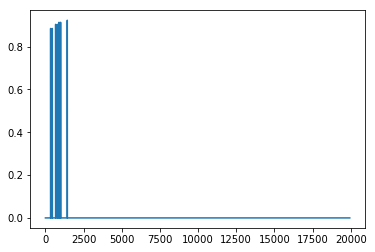

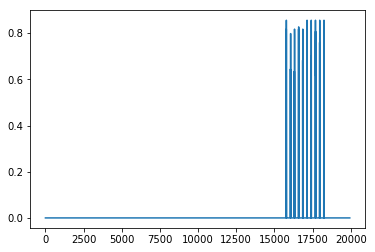

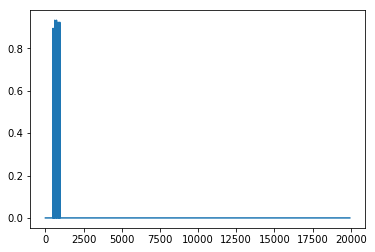

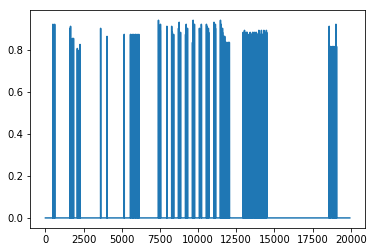

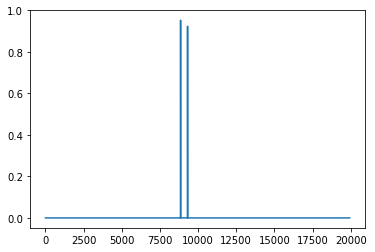

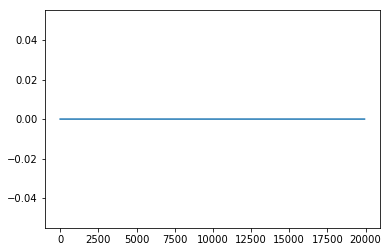

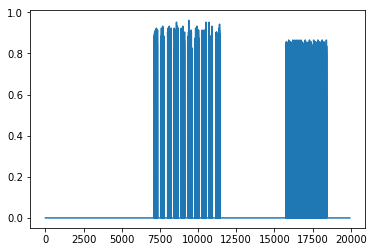

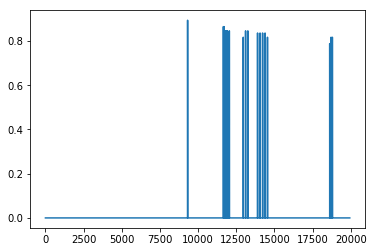

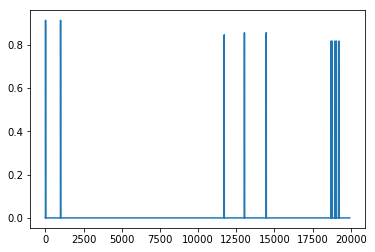

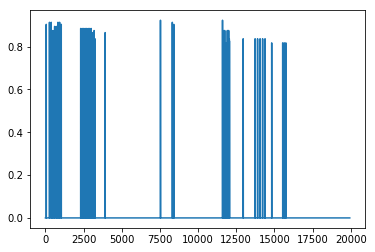

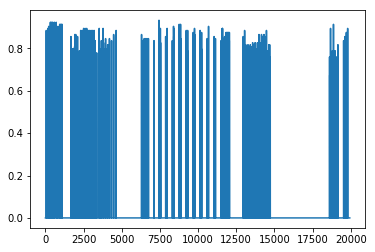

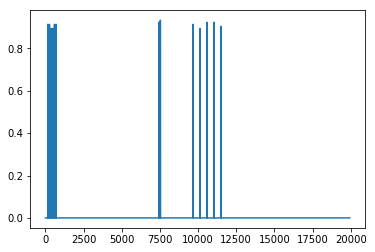

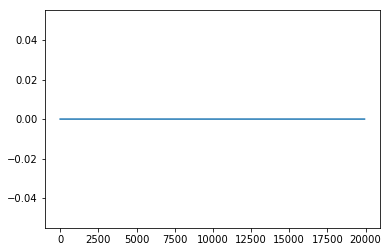

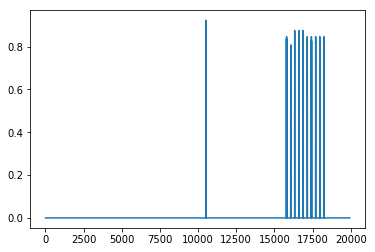

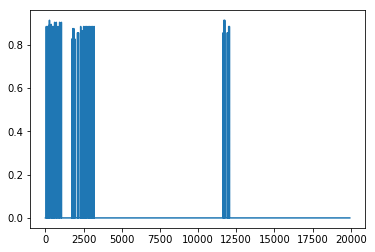

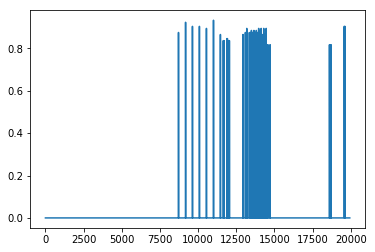

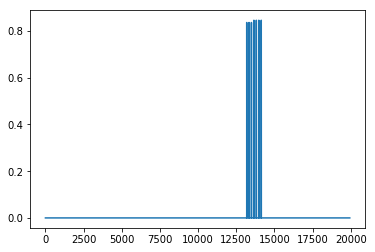

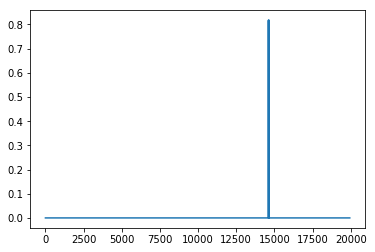

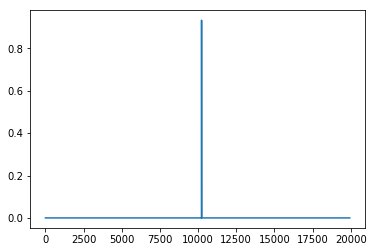

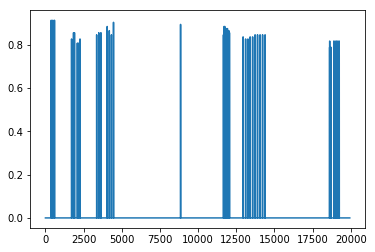

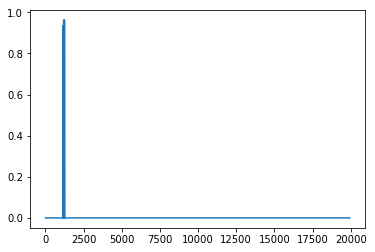

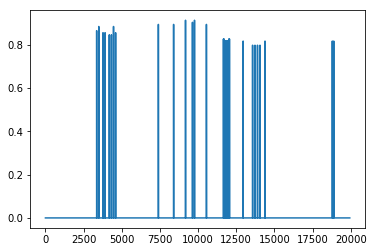

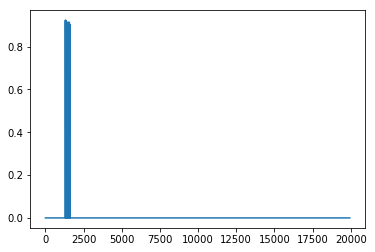

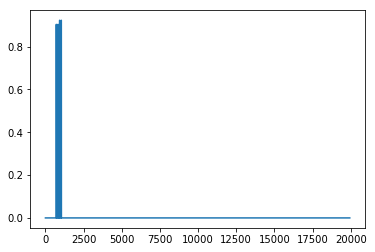

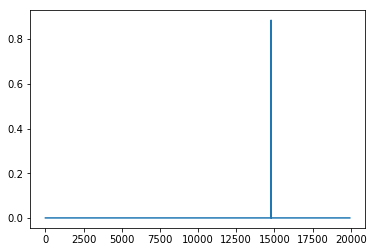

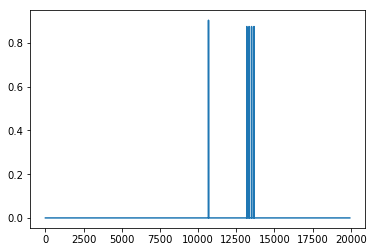

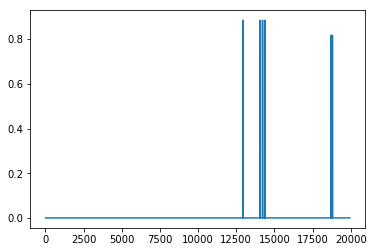

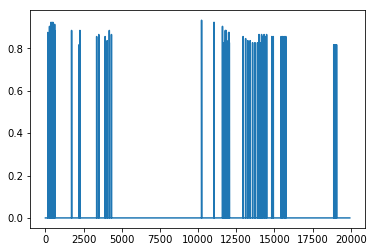

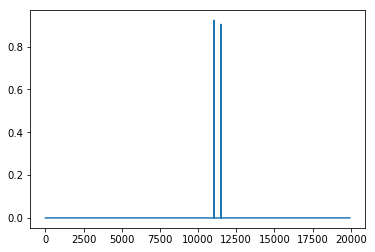

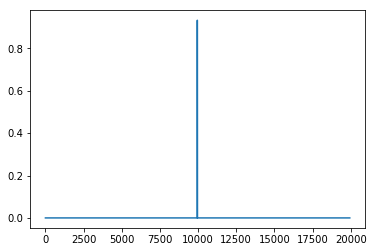

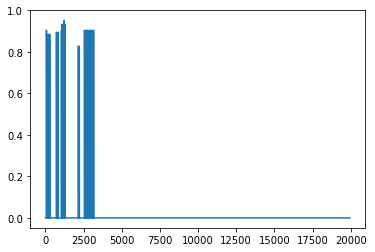

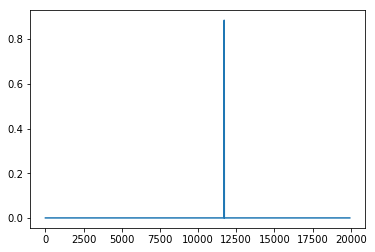

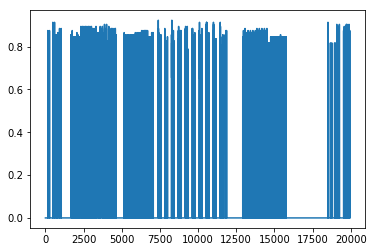

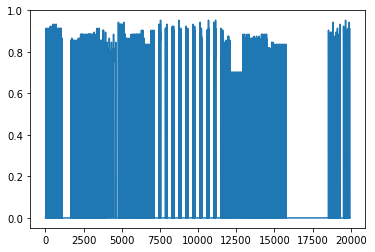

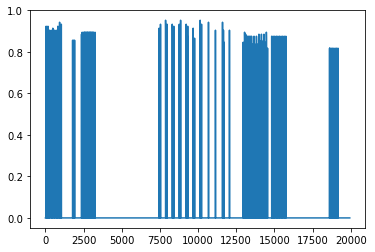

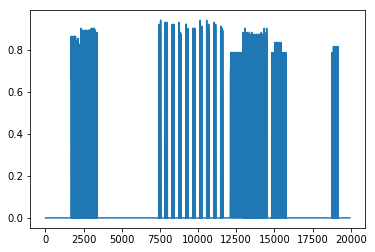

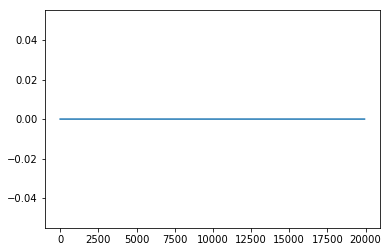

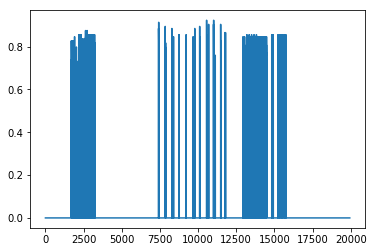

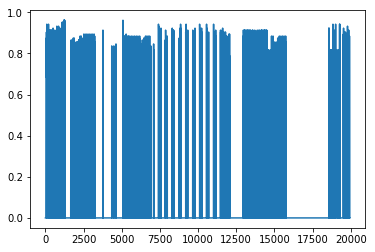

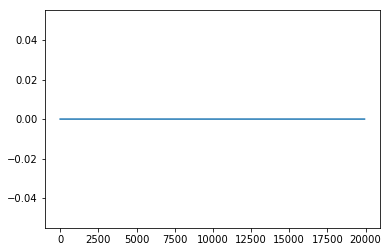

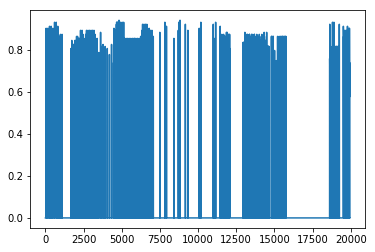

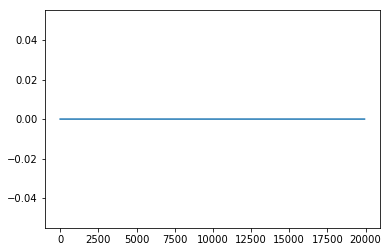

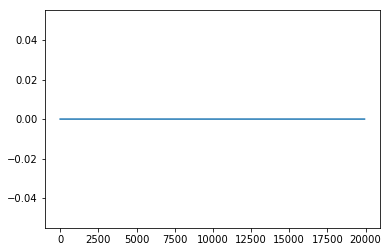

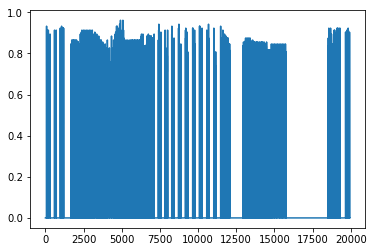

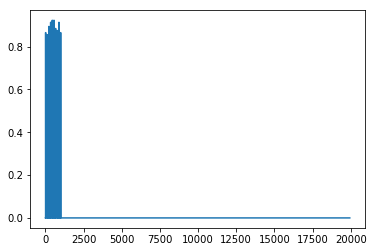

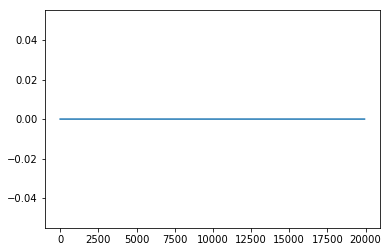

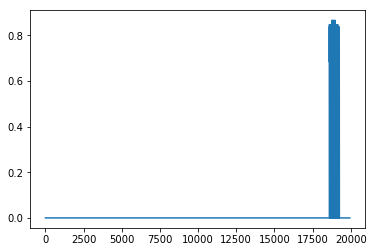

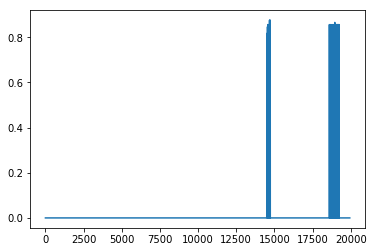

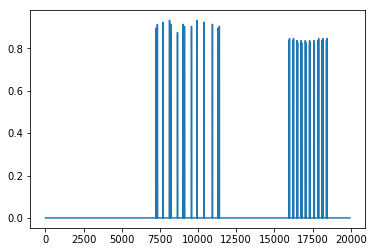

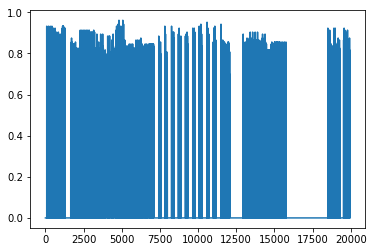

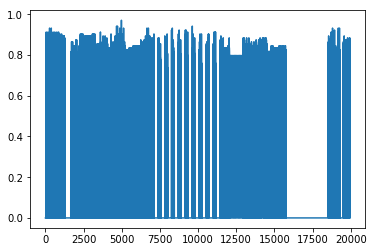

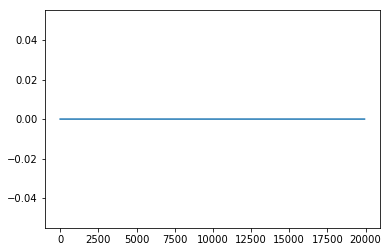

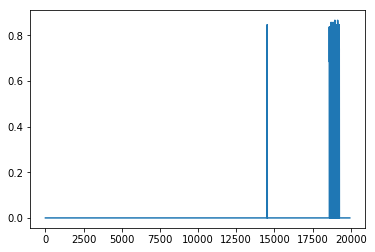

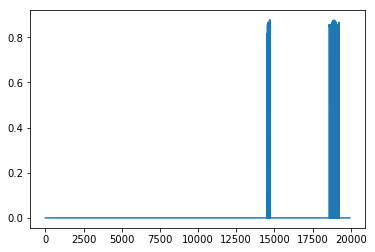

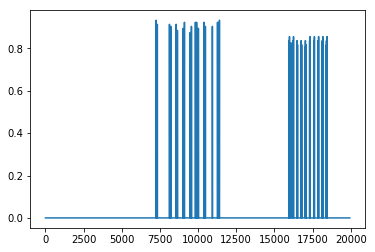

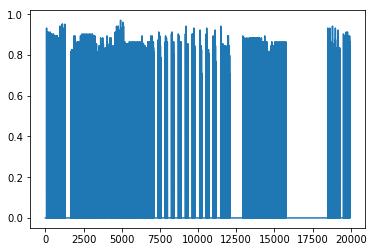

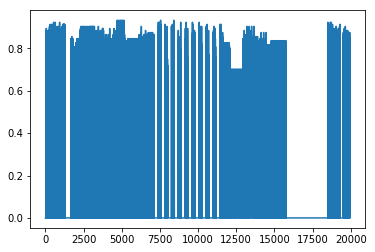

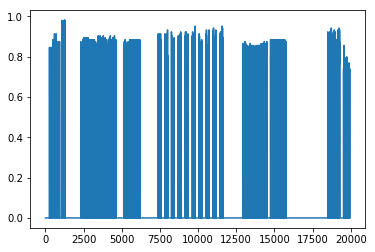

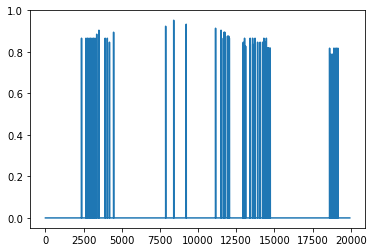

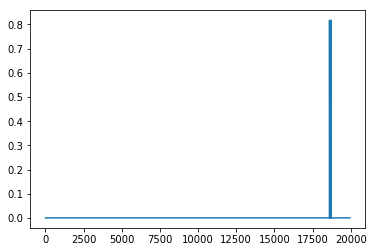

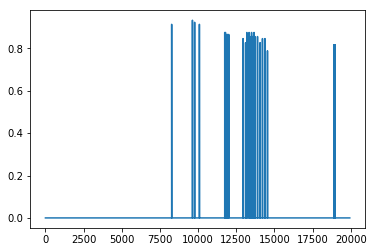

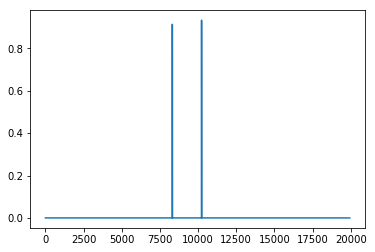

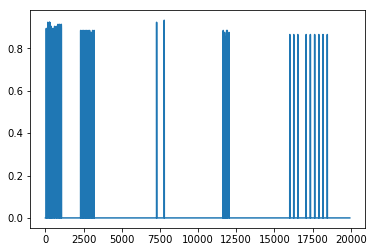

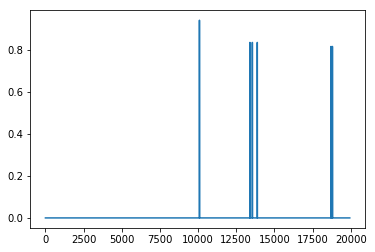

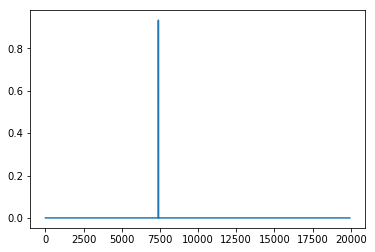

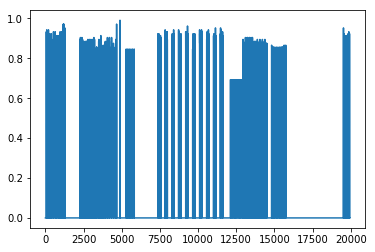

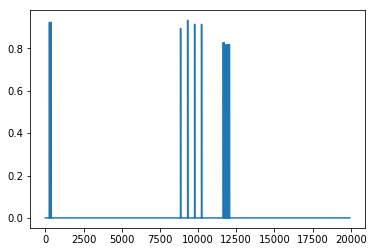

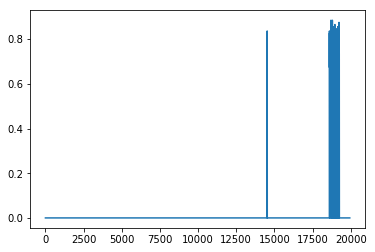

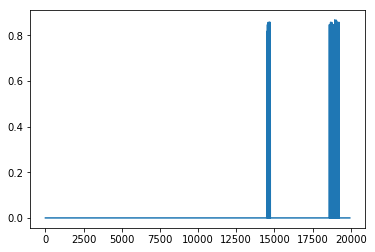

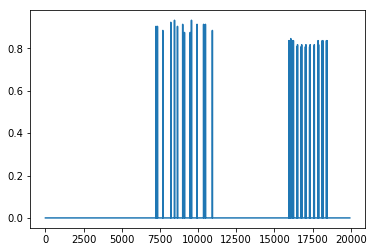

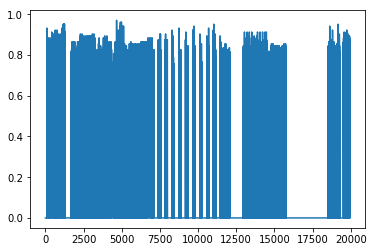

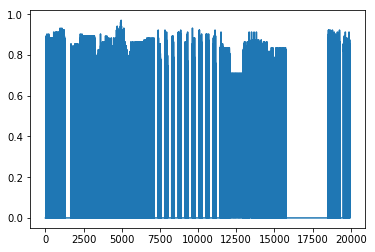

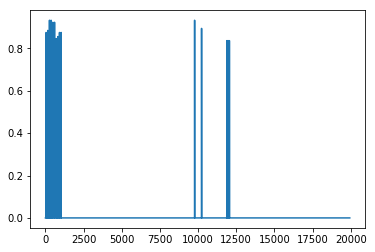

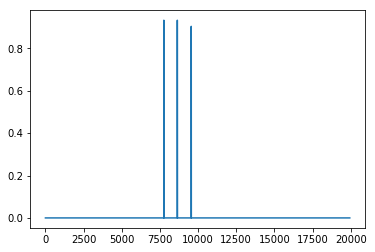

In [69]:
for i in range(1, 519):
    plt.plot(nor_train.iloc[:, i])
    plt.show()

c:\programdata\anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


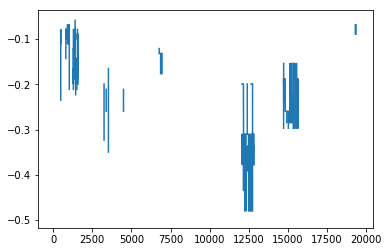

In [61]:
plt.plot(np.log(nor_train.iloc[:, 255]))
plt.show()


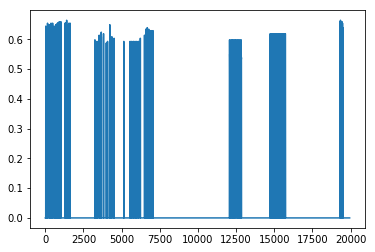

In [68]:
plt.plot(np.log(nor_train.iloc[:, 255]+1))
plt.show()

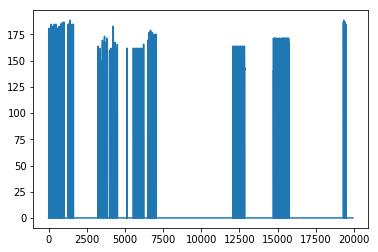

In [73]:
plt.plot(nor_train.iloc[:, 255]*200)
plt.show()

### 변수정규화
각각의 와이파이 신호는 -104부터 0의 값을 가지며 100인경우에는 신호가 잡히지 않음을 의미한다. 
최소잔자제곱법을 효과적으로 사용하기위해서 값을 정규화시킬 필요가 있다. 신호가 잡히지않으면 0, 신호가 강할 수록 1에 가깝게 정규화 시켰다. 

In [5]:
# normalization_1
nor_train = (raw_train.iloc[:, 0:520]-1)/(-105)
nor_train[nor_train == -0.9428571428571428] = 0
nor_train = nor_train.join(raw_train.iloc[:, 520:])

nor_validation = (raw_validation.iloc[:, 0:520]-1)/(-105)
nor_validation[nor_validation == -0.9428571428571428] = 0
nor_validation = nor_validation.join(raw_validation.iloc[:, 520:])

In [6]:
# normalization_2
nor_train = raw_train.iloc[:, 0:520]/(-104)
nor_train[nor_train == -0.9615384615384616] = 0
nor_train = nor_train.join(raw_train.iloc[:, 520:])

nor_validation = raw_validation.iloc[:, 0:520]/(-104)
nor_validation[nor_validation == -0.9615384615384616] = 0
nor_validation = nor_validation.join(raw_validation.iloc[:, 520:])

In [66]:
# remove null columes
check_bool_train = np.sum(nor_train.iloc[:, :520])!=0.0
#nor_train_null = nor_train.iloc[:, check_bool.values]

check_bool_validation = np.sum(nor_validation.iloc[:, :520]!=0.0)
#nor_validation_null = nor_validation.iloc[:, check_bool.values]
check = (check_bool_train | check_bool_validation == True)
check.values

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

---

In [124]:
# set display option
pd.set_option('display.float_format', lambda x: '%.3f' % x)

---

### One-Hot-Encoding
층 수, 빌딩 번호는 명목변수이기 때문에 정수 표현을 위해서는 One-Hot-Encoding이 필요하다.

In [11]:
# one-hot-encoding train & test data
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(dtype=int)

train_c = raw_train.loc[:, ("FLOOR", "BUILDINGID")].values
train_c_e = ohe.fit(train_c)
train_c = train_c_e.transform(train_c).toarray()
train_c = pd.DataFrame(train_c)

validation_c = raw_validation.loc[:, ("FLOOR", "BUILDINGID")].values
validation_c = train_c_e.transform(validation_c).toarray()
validation_c = pd.DataFrame(validation_c)

---

In [32]:
model_KN = KNeighborsRegressor(n_neighbors=3).fit(train_x, train_y)
predic_y = model_KN.predict(validation_x)

predic_y, raw_validation.loc[:, ("LONGITUDE", "LATITUDE")]

(array([[   -7406.82172562,  4864882.45618794],
        [   -7385.5264    ,  4864838.959     ],
        [   -7370.0107    ,  4864847.7535    ],
        ..., 
        [   -7639.4784    ,  4864914.44456666],
        [   -7641.4491    ,  4864919.60056667],
        [   -7639.6588    ,  4864913.35503333]]),
         LONGITUDE      LATITUDE
 0    -7515.916799  4.864890e+06
 1    -7383.867221  4.864840e+06
 2    -7374.302080  4.864847e+06
 3    -7365.824883  4.864843e+06
 4    -7641.499303  4.864922e+06
 5    -7338.807210  4.864825e+06
 6    -7379.351683  4.864849e+06
 7    -7340.558777  4.864759e+06
 8    -7357.531253  4.864766e+06
 9    -7345.085170  4.864831e+06
 10   -7344.182657  4.864754e+06
 11   -7372.664041  4.864844e+06
 12   -7377.067905  4.864849e+06
 13   -7331.100100  4.864767e+06
 14   -7385.871536  4.864840e+06
 15   -7393.435150  4.864837e+06
 16   -7559.678074  4.864887e+06
 17   -7414.450283  4.864788e+06
 18   -7402.404284  4.864806e+06
 19   -7358.379579  4.864837e+06
 20

In [14]:
predic_y[:, 0]-raw_validation.loc[:, "LONGITUDE"]

0       109.095074
1        -1.659179
2         4.291380
3        -6.978017
4        -6.388864
5        17.183610
6        11.020083
7        -7.491556
8        16.646103
9        14.421637
10        2.303340
11        4.773975
12        3.639738
13      -28.536150
14        7.033552
15       51.534750
16       23.512274
17        9.744783
18       -3.738872
19        7.340040
20       -0.980319
21       41.032816
22        5.946173
23      -10.479130
24        3.927423
25        5.400752
26       18.425161
27       14.424507
28        4.893316
29        0.815093
           ...    
1081    -18.678670
1082    -12.475146
1083    -16.821419
1084    -15.142038
1085    -11.320270
1086    -17.182554
1087    -10.491935
1088     -9.143513
1089     -8.352653
1090     -0.969700
1091    -57.577025
1092     17.495063
1093    -43.640853
1094     20.326033
1095      5.118495
1096      3.837472
1097     11.984293
1098      5.478169
1099      8.509420
1100      5.185249
1101      2.132816
1102     -2.

In [23]:
gap = predic_y-raw_validation.loc[:, ("LONGITUDE", "LATITUDE")]
np.mean(gap), np.var(gap)

(LONGITUDE    2.005336
 LATITUDE     2.463519
 dtype: float64, LONGITUDE    206.381604
 LATITUDE     165.627147
 dtype: float64)

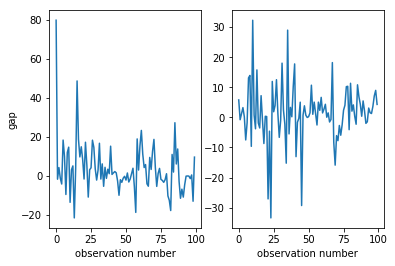

In [24]:
plt.subplot(1, 2, 1)
plt.plot(gap.iloc[:,0][:100])
plt.xlabel("observation number")
plt.ylabel("gap")
plt.subplot(1, 2, 2)
plt.plot(gap.iloc[:,1][:100])
plt.xlabel("observation number")
plt.show()

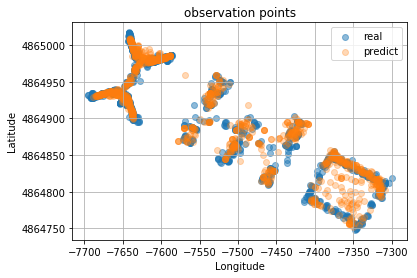

In [25]:
plt.scatter(raw_validation["LONGITUDE"], raw_validation["LATITUDE"], label = "real", alpha=0.5)
plt.scatter(pd.DataFrame(predic_y)[0], pd.DataFrame(predic_y)[1], label = "predict", alpha=0.3)
plt.legend()
plt.grid()
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("observation points")
plt.ticklabel_format(style = "plain")
plt.show()

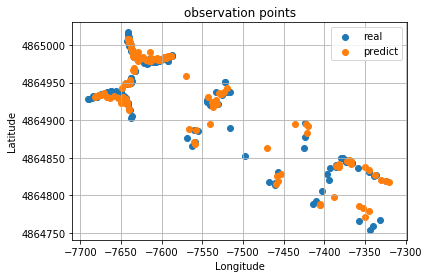

In [26]:
plt.scatter(raw_validation["LONGITUDE"][:150], raw_validation["LATITUDE"][:150], label = "real", )
plt.scatter(pd.DataFrame(predic_y)[0][:150], pd.DataFrame(predic_y)[1][:150], label = "predict")
plt.legend()
plt.grid()
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("observation points")
plt.ticklabel_format(style = "plain")
plt.show()

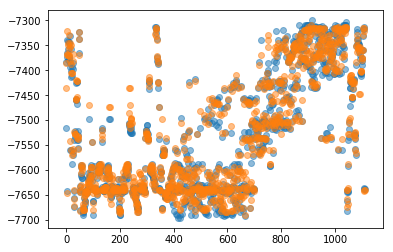

In [27]:
plt.scatter(y = raw_validation["LONGITUDE"], x = raw_validation.index, alpha=0.5)
plt.scatter(y = pd.DataFrame(predic_y)[0], x = pd.DataFrame(predic_y).index, alpha=0.5)
plt.show()

In [28]:
raw_gap = raw_validation.loc[:, ("LONGITUDE", "LATITUDE")]

In [29]:
pre_gap = pd.DataFrame(predic_y, columns=["LONGITUDE", "LATITUDE"])

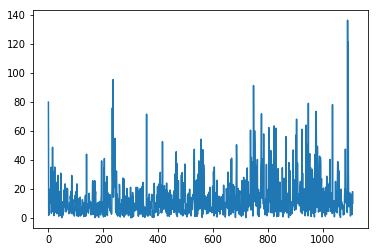

In [30]:
plt.plot(np.sqrt(np.sum((raw_gap-pre_gap)*(raw_gap-pre_gap), axis=1)))
plt.show()

In [31]:
np.mean(np.sqrt(np.sum((raw_gap-pre_gap)*(raw_gap-pre_gap), axis=1)))

13.613060714617953

### 데이터분할
WIFI신호세기를 통해 좌표를 추정하기 위해 train_x에는 WIFI신호를, train_y에는 좌표값을 입력하였다. 

In [8]:
# train_1
##train_y = nor_train["LONGITUDE"]
train_y = nor_train.loc[:, ("LONGITUDE", "LATITUDE")]
train_x = nor_train.iloc[:, 0:520]
train_x = train_x.join(train_c)
##train_x = sm.add_constant(train_x)

model_1 = sm.OLS(train_y, train_x).fit()


### OLS모델

In [43]:
model_1 = sm.OLS(train_y, train_x).fit()

### 예측
위에서 만든 OLS모델에 validation값을 넣어 좌표를 예측했다.

In [12]:
# test_1
validation_x = nor_validation.iloc[:, 0:520]
validation_x = validation_x.join(validation_c)
##validation_x = sm.add_constant(validation_x)

validation_y = model_1.predict(validation_x)
pd.DataFrame(validation_y, columns=["LONGITUDE", "LATITUDE"]).head()

NameError: name 'model_1' is not defined

In [45]:
raw_validation.loc[:, ("LONGITUDE", "LATITUDE")].head()

LONGITUDE      LATITUDE
0 -7515.916799  4.864890e+06
1 -7383.867221  4.864840e+06
2 -7374.302080  4.864847e+06
3 -7365.824883  4.864843e+06
4 -7641.499303  4.864922e+06

---

### 예측값과 실제값의 차이

In [55]:
#pd.DataFrame(validation_y, columns=["LONGITUDE_pre", "LATITUDE_pre"])
validation_y.rename(columns={0:"LONGITUDE_pre", 1:"LATITUDE_pre"})
result.loc[""]

AttributeError: 'numpy.ndarray' object has no attribute 'rename'

In [56]:
# GAP
validation_y = pd.DataFrame(validation_y, columns=["LONGITUDE_pre", "LATITUDE_pre"])

result = validation_y.join(raw_validation.loc[:, ("LONGITUDE", "LATITUDE")])
result["LONG_Gap"] = raw_validation.loc[:, "LONGITUDE"] - validation_y.loc[:, "LONGITUDE_pre"]
result["LAT_Gap"] = raw_validation.loc[:, "LATITUDE"] - validation_y.loc[:, "LATITUDE_pre"]
result.head()

LONGITUDE_pre  LATITUDE_pre    LONGITUDE      LATITUDE   LONG_Gap   LAT_Gap
0   -7477.432373  4.864884e+06 -7515.916799  4.864890e+06 -38.484426  6.061255
1   -7363.458520  4.864843e+06 -7383.867221  4.864840e+06 -20.408701 -3.493817
2   -7367.808646  4.864840e+06 -7374.302080  4.864847e+06  -6.493434  6.263347
3   -7354.857336  4.864841e+06 -7365.824883  4.864843e+06 -10.967547  1.679182
4   -7635.964733  4.864923e+06 -7641.499303  4.864922e+06  -5.534570 -1.052412

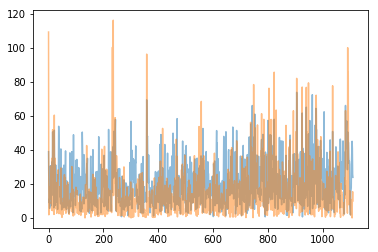

In [59]:
plt.plot(np.sqrt(np.sum(result.loc[:, ["LONG_Gap", "LAT_Gap"]]*result.loc[:, ["LONG_Gap", "LAT_Gap"]], axis=1)), alpha=0.5)
plt.plot(np.sqrt(np.sum((raw_gap-pre_gap)*(raw_gap-pre_gap), axis=1)), alpha=0.5)
plt.show()

In [65]:
np.sqrt(np.sum(result.loc[:, ["LONG_Gap", "LAT_Gap"]]*result.loc[:, ["LONG_Gap", "LAT_Gap"]], axis=1))

0       38.958823
1       20.705599
2        9.021873
3       11.095348
4        5.633741
5       24.492446
6       18.421637
7       30.660691
8       12.351042
9        7.136515
10      27.068507
11      13.013264
12      13.463739
13      32.949765
14      23.987700
15      50.586911
16      26.484190
17      33.089948
18      37.689661
19       5.970587
20      40.443745
21      51.543093
22      27.970571
23      17.124447
24       9.064617
25       7.406391
26      31.121432
27      22.195333
28       9.375274
29      17.223500
          ...    
1081    27.227523
1082    29.872191
1083    66.136758
1084    40.671286
1085    47.737167
1086    51.442758
1087    56.314495
1088    56.952467
1089    44.157818
1090    28.346798
1091    50.570668
1092    32.679086
1093    44.583582
1094    44.304364
1095    35.639370
1096    32.120452
1097    33.425094
1098    31.524466
1099     7.209804
1100     5.018070
1101     1.794521
1102    14.299128
1103    16.418380
1104    17.572803
1105    33

In [62]:
result.loc[:, ["LONG_Gap", "LAT_Gap"]]

LONG_Gap    LAT_Gap
0    -38.484426   6.061255
1    -20.408701  -3.493817
2     -6.493434   6.263347
3    -10.967547   1.679182
4     -5.534570  -1.052412
5    -24.064275   4.559671
6    -18.383126   1.190534
7     23.368198 -19.849567
8      1.409885 -12.270308
9     -0.900646   7.079455
10    11.102540 -24.686791
11   -12.422023  -3.877934
12   -13.323411   1.938813
13    29.896945 -13.851341
14   -23.095390   6.481723
15   -47.007309  18.690865
16    -8.890420 -24.947400
17   -30.925366 -11.771425
18   -37.657834   1.548565
19     3.667747   4.711214
20    29.127338 -28.058772
21    42.217888  29.569247
22   -27.503649  -5.089411
23    -5.796667  16.113515
24     7.710983  -4.765294
25    -7.275025   1.388751
26   -30.142001  -7.746181
27    -8.447104 -20.525088
28     7.248810   5.945631
29    -8.611941  14.915878
...         ...        ...
1081  19.579406 -18.920489
1082  14.794619 -25.951243
1083  14.584001 -64.508741
1084  34.718100 -21.185067
1085  31.068947 -36.243036
1086  21.734850 -46.625676
1087  27.290975 -49.259772
1088  21.445121 -52.760688
1089  27.542264 -34.515744
1090  21.790103 -18.130978
1091  18.066386 -47.233444
1092   5.763455 -32.166835
1093  -5.815910 -44.202613
1094 -34.932692 -27.250389
1095 -31.071999 -17.455531
1096 -28.245748 -15.293827
1097 -32.201455  -8.961205
1098 -30.981786  -5.824164
1099  -7.084450   1.338598
1100  -1.541782   4.775346
1101   1.494730  -0.993019
1102  -4.632796  13.527833
1103 -12.821176  10.255761
1104  15.733679  -7.826541
1105  32.641794  -5.973970
1106  30.257503 -24.364433
1107  34.698176 -28.761828
1108  -9.719631 -39.859877
1109  12.433316 -22.555472
1110  -7.198443 -22.746216

[1111 rows x 2 columns]

---

### 시각화

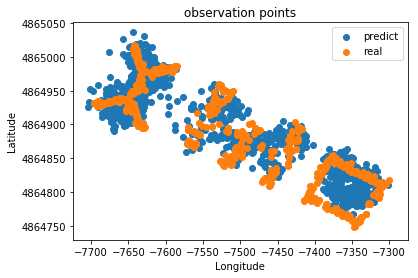

In [13]:
# Visualization_1
plt.scatter(validation_y["LONGITUDE_pre"], validation_y["LATITUDE_pre"], label = "predict")
plt.scatter(raw_validation["LONGITUDE"], raw_validation["LATITUDE"], label = "real")
plt.legend()
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("observation points")
plt.ticklabel_format(style = "plain")
plt.show()

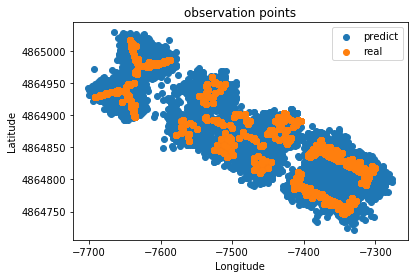

In [14]:
# Visualization_2
plt.scatter(model_1.fittedvalues.iloc[:, 0], model_1.fittedvalues.iloc[:, 1], label = "predict")
plt.scatter(raw_train["LONGITUDE"], raw_train["LATITUDE"], label = "real")
plt.legend()
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("observation points")
plt.ticklabel_format(style = "plain")
plt.show()

---

### 분류
좌표값에 맞추어 해당 빌딩을 분류

In [15]:
# classification_1(BUILDINGID)
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
class_x = nor_train.loc[:, ("LONGITUDE", "LATITUDE")]
class_y = nor_train.loc[:, ("BUILDINGID")]
model_c = QuadraticDiscriminantAnalysis().fit(class_x, class_y)

In [16]:
# predict_1(BUILDINGID)
pre_x = nor_validation.loc[:, ("LONGITUDE", "LATITUDE")]
predict_y = model_c.predict(pre_x)
predict_y

array([1, 2, 2, ..., 0, 0, 0], dtype=int64)

### 분류값과 실제값의 차이

In [17]:
# GAP
result = pd.DataFrame(predict_y, columns=["predict"])
result["real"] = nor_validation.loc[:, "BUILDINGID"]
result["LONGITUDE"] = nor_validation.loc[:, "LONGITUDE"]
result["LATITUDE"] = nor_validation.loc[:, "LATITUDE"]
len(result[result["predict"]==result["real"]])/len(result["predict"])

1.0

In [18]:
result.head()

predict  real  LONGITUDE    LATITUDE
0        1     1  -7515.917 4864889.663
1        2     2  -7383.867 4864839.740
2        2     2  -7374.302 4864846.534
3        2     2  -7365.825 4864842.829
4        0     0  -7641.499 4864922.399

### 분류결과보고서

In [19]:
# classify result reporting
from sklearn.metrics import *
print(classification_report(y_true=nor_validation.loc[:, "BUILDINGID"], y_pred=predict_y))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00       536
          1       1.00      1.00      1.00       307
          2       1.00      1.00      1.00       268

avg / total       1.00      1.00      1.00      1111



---

### 시각화

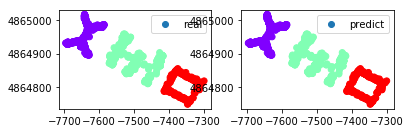

In [37]:
# Visualization
plt.subplot(221)
plt.scatter("LONGITUDE", "LATITUDE", data = result, c = "real", cmap="rainbow", label="real")
plt.legend()
plt.subplot(222)
plt.scatter("LONGITUDE", "LATITUDE", data = result, c = "predict", cmap="rainbow", label="predict")
plt.legend()
plt.show()